In [2336]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import missingno
import scipy.stats as st
import scikitplot as skplt
import warnings
import statsmodels.api as sm
import featuretools as ft
import pickle
import scikit_posthocs as sp
import imgkit
import os
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
import copy

from operator import add, truediv
from shutil import copyfile
from plotly.offline import init_notebook_mode,iplot
from pathlib import Path
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import learning_curve

#classifiers
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from mlens.ensemble import BlendEnsemble
from mlxtend.classifier import EnsembleVoteClassifier
from vecstack import stacking
from sklearn.ensemble import BaggingClassifier

#sometimes the import of imblearn triggers a bug -.-'
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.tree._tree import TREE_LEAF

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, cross_validate, StratifiedKFold, RandomizedSearchCV, GridSearchCV

from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

%matplotlib inline
warnings.filterwarnings('ignore')

In [2277]:
#Load Data
df = pd.read_csv('adult.csv')
###
df = df[0:50]

# **EXPLORATORY ANALYSIS**

In [2278]:
# Preview Data
display(df.shape)
display(df.head())
display(df.tail())
display(df.info())

(50, 15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
45,48,Private,121253,Bachelors,13,Married-spouse-absent,Sales,Unmarried,White,Female,0,2472,70,United-States,>50K
46,71,Private,110380,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,2467,52,United-States,<=50K
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,<=50K
48,68,?,192052,Some-college,10,Married-civ-spouse,?,Wife,White,Female,0,2457,40,United-States,<=50K
49,67,?,174995,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,2457,40,United-States,<=50K


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
age               50 non-null int64
workclass         50 non-null object
fnlwgt            50 non-null int64
education         50 non-null object
education.num     50 non-null int64
marital.status    50 non-null object
occupation        50 non-null object
relationship      50 non-null object
race              50 non-null object
sex               50 non-null object
capital.gain      50 non-null int64
capital.loss      50 non-null int64
hours.per.week    50 non-null int64
native.country    50 non-null object
income            50 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ KB


None

In [2279]:
# Value Counts
for col in df.columns:
    display(df[col].value_counts())

51    5
38    3
37    3
43    2
68    2
71    2
54    2
34    2
52    2
61    2
41    2
45    2
23    1
82    1
22    1
21    1
29    1
74    1
73    1
67    1
90    1
63    1
32    1
33    1
44    1
46    1
48    1
49    1
53    1
57    1
59    1
60    1
66    1
Name: age, dtype: int64

Private             34
?                    7
Self-emp-not-inc     4
Federal-gov          2
Self-emp-inc         2
State-gov            1
Name: workclass, dtype: int64

422013    1
107287    1
197163    1
119592    1
121253    1
317847    1
44064     1
123011    1
107164    1
161691    1
203034    1
129177    1
172822    1
115066    1
70037     1
174995    1
149650    1
172175    1
153870    1
39181     1
136204    1
132870    1
216864    1
29059     1
110380    1
164526    1
45363     1
192052    1
34310     1
88638     1
77053     1
172274    1
188774    1
326232    1
233882    1
115806    1
228696    1
264663    1
137527    1
100820    1
122066    1
77009     1
198863    1
186061    1
150601    1
140359    1
135285    1
205246    1
289669    1
175360    1
Name: fnlwgt, dtype: int64

HS-grad         11
Some-college     8
Bachelors        6
Masters          5
Doctorate        5
Prof-school      4
10th             4
11th             2
Assoc-voc        1
Assoc-acdm       1
7th-8th          1
1st-4th          1
5th-6th          1
Name: education, dtype: int64

9     11
10     8
13     6
16     5
14     5
15     4
6      4
7      2
12     1
11     1
4      1
3      1
2      1
Name: education.num, dtype: int64

Divorced                 16
Never-married            12
Married-civ-spouse       10
Separated                 6
Widowed                   5
Married-spouse-absent     1
Name: marital.status, dtype: int64

Prof-specialty       11
Exec-managerial      11
?                     7
Sales                 6
Other-service         4
Craft-repair          3
Transport-moving      3
Adm-clerical          2
Handlers-cleaners     1
Farming-fishing       1
Machine-op-inspct     1
Name: occupation, dtype: int64

Not-in-family     26
Unmarried         13
Husband            8
Wife               1
Other-relative     1
Own-child          1
Name: relationship, dtype: int64

White                 45
Black                  4
Asian-Pac-Islander     1
Name: race, dtype: int64

Male      28
Female    22
Name: sex, dtype: int64

0    50
Name: capital.gain, dtype: int64

2559    12
2824    10
2603     5
2547     4
2457     3
4356     3
3900     2
3770     2
3683     2
3004     2
2754     2
2489     1
2472     1
2467     1
Name: capital.loss, dtype: int64

40    21
50     8
60     4
45     2
20     2
32     2
25     1
76     1
15     1
18     1
35     1
90     1
55     1
42     1
48     1
52     1
70     1
Name: hours.per.week, dtype: int64

United-States    45
?                 2
Greece            1
Vietnam           1
Mexico            1
Name: native.country, dtype: int64

>50K     30
<=50K    20
Name: income, dtype: int64

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text xticklabel objects>)

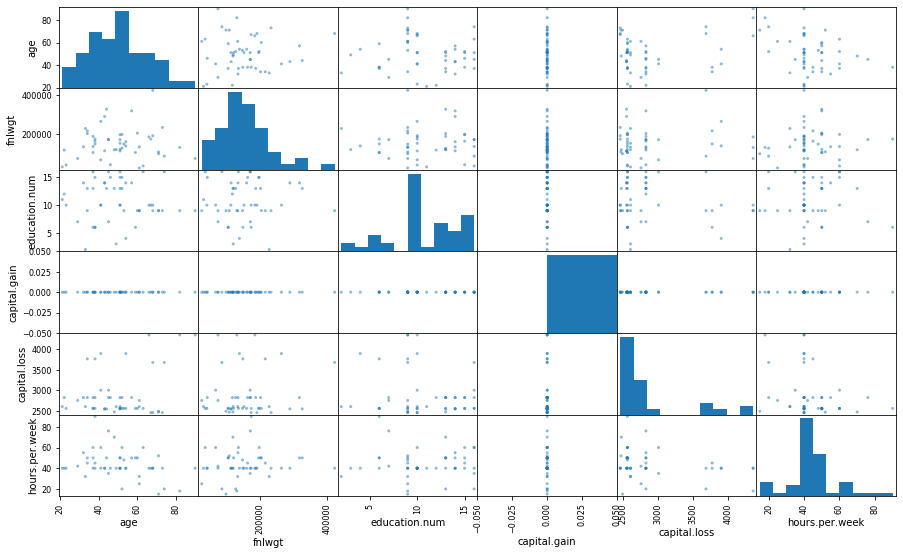

In [2280]:
# Values Distributions
pd.plotting.scatter_matrix(df.head(500), figsize = (15,9), diagonal = 'hist' )
plt.xticks(rotation = 90)

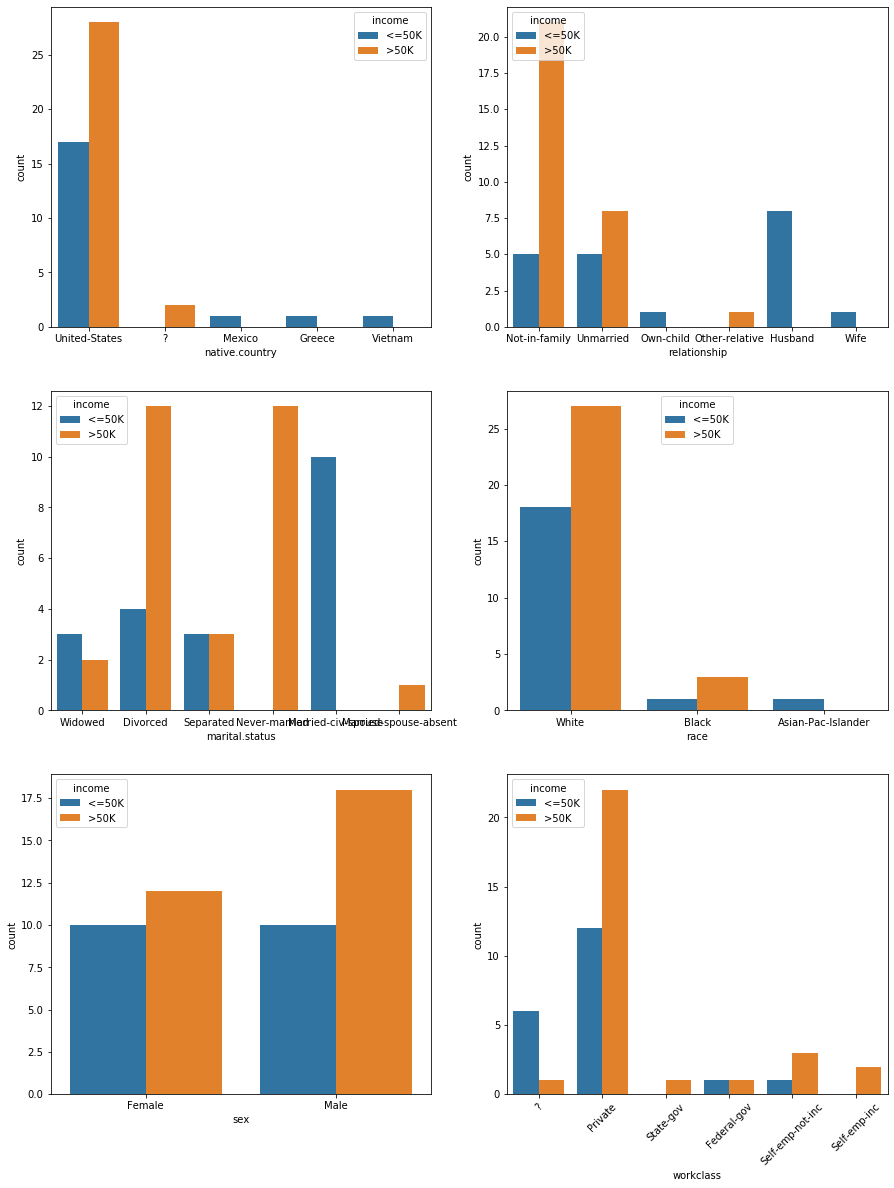

In [2281]:
#Relation of Each Feature with the target
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(df['workclass'],hue=df['income'],ax=f)
sns.countplot(df['relationship'],hue=df['income'],ax=b)
sns.countplot(df['marital.status'],hue=df['income'],ax=c)
sns.countplot(df['race'],hue=df['income'],ax=d)
sns.countplot(df['sex'],hue=df['income'],ax=e)
sns.countplot(df['native.country'],hue=df['income'],ax=a)

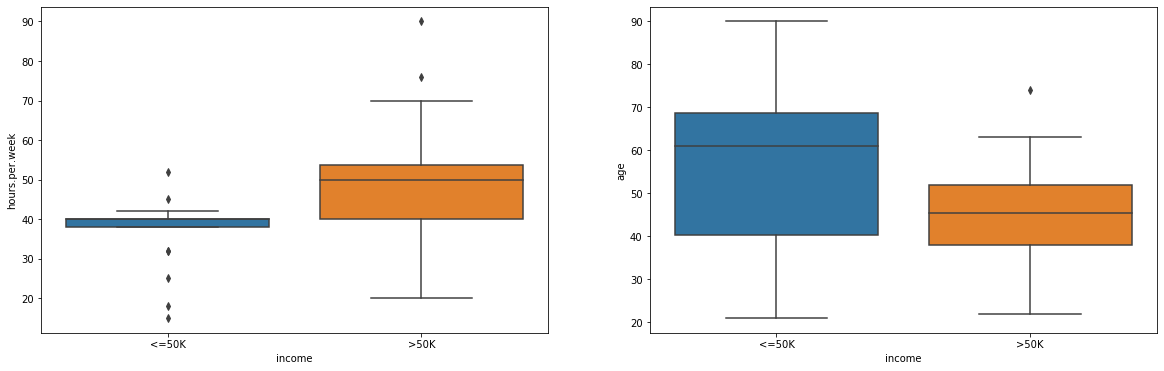

In [2282]:
#Relation of Each Feature with the target
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours.per.week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)

In [2283]:
#additional operations to manipulate data and see it through different perspectives

#df.sort_values(['age','fnlwgt'], ascending = False).head(20)
#df.groupby(df.age).count().plot(kind = 'bar')
#df.groupby('age')['fnlwgt'].mean().sort_values(ascending = False).head(10)
#pd.crosstab(df.age, df.fnlwgt).apply(lambda x: x/x.sum(), axis=1)
#df['young_male'] = ((df.fnlwgt == '19302') & (df.age < 30)).map({True: 'young male', False: 'other'})
#display(df['young_male'])

# Data Pre-Processing


## Nonsense values
Negative Values, etc

In [2284]:
pd.set_option('display.max_columns', 100)
for col in df:
    print(col)
    print (df[col].unique())
    print('\n')


age
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67]


workclass
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc']


fnlwgt
[ 77053 132870 186061 140359 264663 216864 150601  88638 422013  70037
 172274 164526 129177 136204 172175  45363 172822 317847 119592 203034
 188774  77009  29059 153870 135285  34310 228696 122066 107164 175360
  44064 107287 198863 123011 205246  39181 149650 197163 137527 161691
 326232 115806 115066 289669 100820 121253 110380 233882 192052 174995]


education
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th']


education.num
[ 9 10  4  6 16 15 13 14  7 12 11  2  3]


marital.status
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent']


occupation
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-r

In [2285]:
display(df.describe(include = 'all')) #it helps to understand non-sense values

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,50.000000,50,50.000000,50,50.000000,50,50,50,50,50,50.0,50.000000,50.000000,50,50
unique,NaN,6,NaN,13,NaN,6,11,6,3,2,NaN,NaN,NaN,5,2
top,NaN,Private,NaN,HS-grad,NaN,Divorced,Prof-specialty,Not-in-family,White,Male,NaN,NaN,NaN,United-States,>50K
freq,NaN,34,NaN,11,NaN,16,11,26,45,28,NaN,NaN,NaN,45,30
mean,50.180000,NaN,155552.080000,NaN,10.740000,NaN,NaN,NaN,NaN,NaN,0.0,2884.800000,44.000000,NaN,NaN
std,15.467794,NaN,78007.683063,NaN,3.595973,NaN,NaN,NaN,NaN,NaN,0.0,547.227744,13.605221,NaN,NaN
min,21.000000,NaN,29059.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.0,2457.000000,15.000000,NaN,NaN
25%,38.000000,NaN,111551.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.0,2559.000000,40.000000,NaN,NaN
50%,51.000000,NaN,145004.500000,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.0,2603.000000,40.000000,NaN,NaN
75%,60.750000,NaN,191232.500000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,0.0,2824.000000,50.000000,NaN,NaN


In [2286]:
#CHECK FOR NEGATIVE VALUES BY COLORING THEM
def color_negative_red(val):
    color = 'red' if val <= 0 else 'black'
    return 'color: %s' % color

test = df[['age','capital.gain', 'capital.loss', 'education.num', 'fnlwgt']]
colored = test.head().style.applymap(color_negative_red)

display(colored)

,age,capital.gain,capital.loss,education.num,fnlwgt
0,90,0,4356,9,77053
1,82,0,4356,9,132870
2,66,0,4356,10,186061
3,54,0,3900,4,140359
4,41,0,3900,10,264663


## Missing Values


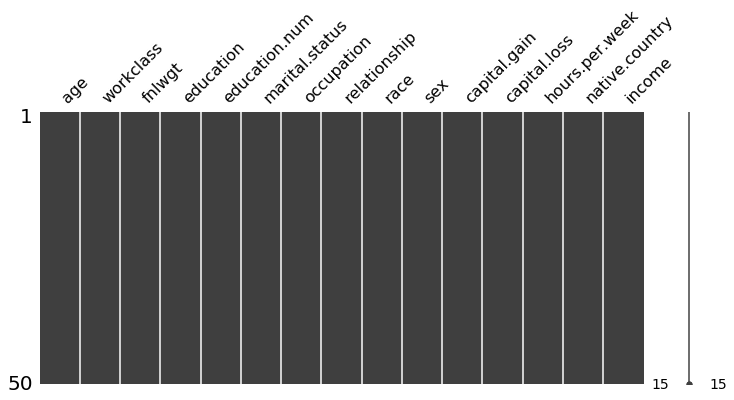

In [2287]:
missingno.matrix(df, figsize=(12, 5))

In [2288]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [2289]:
#convert '?' to NaN
df[df == '?'] = np.nan

#fill the NaN values with the mode. It could be filled with median, mean, etc
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

display(df.head())    
    
#we could fill every missing values with medians of the columns
#df = data.fillna(df.median())

#also, instead of fill, we can remove every row in which 10% of the values are missing
# df = df.loc[df.isnull().mean(axis=1) < 0.1]    
    
"""
#It is possible to use an imputer. and fill with the values of median, mean, etc
#If imputation technique is used, it is a good practice to add an additional binary feature as a missing indicator.
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan,  add_indicator=True)
imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='constant')
df = pd.DataFrame(imputer.fit_transform(df))
"""

"""
# It is also possible to run a bivariate imputer (iterative imputer). However, it is needed to do labelencoding first. The code below enables us to run the imputer with a Random Forest estimator
# The Iterative Imputer is developed by Scikit-Learn and models each feature with missing values as a function of other features. It uses that as an estimate for imputation. At each step, a feature is selected as output y and all other features are treated as inputs X. A regressor is then fitted on X and y and used to predict the missing values of y. This is done for each feature and repeated for several imputation rounds.
# The great thing about this method is that it allows you to use an estimator of your choosing. I used a RandomForestRegressor to mimic the behavior of the frequently used missForest in R.
imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

#If you have sufficient data, then it might be an attractive option to simply delete samples with missing data. However, keep in mind that it could create bias in your data. Perhaps the missing data follows a pattern that you miss out on.

#The Iterative Imputer allows for different estimators to be used. After some testing, I found out that you can even use Catboost as an estimator! Unfortunately, LightGBM and XGBoost do not work since their random state names differ.
"""

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


'\n# It is also possible to run a bivariate imputer (iterative imputer). However, it is needed to do labelencoding first. The code below enables us to run the imputer with a Random Forest estimator\n# The Iterative Imputer is developed by Scikit-Learn and models each feature with missing values as a function of other features. It uses that as an estimate for imputation. At each step, a feature is selected as output y and all other features are treated as inputs X. A regressor is then fitted on X and y and used to predict the missing values of y. This is done for each feature and repeated for several imputation rounds.\n# The great thing about this method is that it allows you to use an estimator of your choosing. I used a RandomForestRegressor to mimic the behavior of the frequently used missForest in R.\nimp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)\ndf = pd.DataFrame(imp.fit_transform(df), columns=df.columns)\n\n#If you have sufficient data, then it mig

(more examples of operations for replacing values if needed in the future)

In [2290]:
"""
#Replace specific values if needed
Replace symbol in whole column
df['age'] = df['age'].str.replace('–', '**', regex = True)


#DROP multiple columns
df.drop(['age' , 'fnlwgt'], axis = 1, inplace = True)


#Find text with regex and replace with nothing
 df = df.replace({
     'age':'[A-Za-z]', 
     'fnlwgt': '[A-Za-z]',
 },'',regex = True)


#Example of applying a formula to entire column

 def euro(cell):
     cell = cell.strip('€')
     return cell
 df.Wage = df.Wage.apply(euro)

#Insert value in cell depending on values from other cells
 def impute_age(cols):
     age = cols[0]
     Pclass = cols[1]
     if pd.isnull(Age):
         if Pclass == 1:
             return 37
         else:
             return 24
     else:
         return Age
         
#CHANGING DATA TYPES
#changing values to float
df[['Value','Wage','Age']].apply(pd.to_numeric, errors = 'coerce')
df.column.astype(float)
df.dtypes
"""

"\n#Replace specific values if needed\nReplace symbol in whole column\ndf['age'] = df['age'].str.replace('–', '**', regex = True)\n\n\n#DROP multiple columns\ndf.drop(['age' , 'fnlwgt'], axis = 1, inplace = True)\n\n\n#Find text with regex and replace with nothing\n df = df.replace({\n     'age':'[A-Za-z]', \n     'fnlwgt': '[A-Za-z]',\n },'',regex = True)\n\n\n#Example of applying a formula to entire column\n\n def euro(cell):\n     cell = cell.strip('€')\n     return cell\n df.Wage = df.Wage.apply(euro)\n\n#Insert value in cell depending on values from other cells\n def impute_age(cols):\n     age = cols[0]\n     Pclass = cols[1]\n     if pd.isnull(Age):\n         if Pclass == 1:\n             return 37\n         else:\n             return 24\n     else:\n         return Age\n         \n#CHANGING DATA TYPES\n#changing values to float\ndf[['Value','Wage','Age']].apply(pd.to_numeric, errors = 'coerce')\ndf.column.astype(float)\ndf.dtypes\n"

## Duplicates
We can confidently remove duplicates now, because when we'll do the oversampling we we'll use the Smote method that won't generate more duplicates (in contrast to RandomOverSampling). Also, by doing this before the oversampling, we are guaranteeing that we'll have exactly 50%-50% of y-labels balance later.

In [2291]:
print(df.duplicated().sum()) #check if there are duplicates
df.drop_duplicates(keep = 'first', inplace = True) #get rid of them

0


## Feature Transformation/Creation
- Feature Transformation (Modidy existing features) -> Scaling, normalize, standarize, logarithim, ...
- Feature Creation (Add useful features) -> Modify to new, Combine features, Cluster some feature, ...

### Binning
Binning continuous variables prevents overfitting which is a common problem for tree based models like decision trees and random forest. It also helps dealing with outliers.

Let's binning the age and see later if the results improved or not. 

Binning with fixed-width intervals (good for uniform distributions). For skewed distributions (not normal), we can use binning adaptive (quantile based).

In [2292]:
#Binner adaptive
binner = KBinsDiscretizer(encode='ordinal')
binner.fit(df[['age']])
df['age'] = binner.transform(df[['age']])

"""
#Using fixed-width intervals
age_labels = ['infant','child','teenager','young_adult','adult','old', 'very_old']

ranges = [0,5,12,18,35,60,81,100]

df['age'] = pd.cut(df.age, ranges, labels = age_labels)

"""

"\n#Using fixed-width intervals\nage_labels = ['infant','child','teenager','young_adult','adult','old', 'very_old']\n\nranges = [0,5,12,18,35,60,81,100]\n\ndf['age'] = pd.cut(df.age, ranges, labels = age_labels)\n\n"

### Label Encoding

In [2293]:
categorical = ['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
numerical = ['fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [2294]:
#using labelencoder
le = LabelEncoder()
for feature in categorical:
        df[feature] = le.fit_transform(df[feature])

## Finding Outliers

We can detect outliers in 3 ways:

- Standard Deviation
- Percentiles (Tukey method)
- Isolation Forest or LocalOutlierFactor (more appropriate for Anomaly/Fraud Detection Problems)

Then, we can handle them by:
 - Remove them
 - Change them to max/min limit
 
The definition of outlier is quite dubious, but we can defined them as those values that surpasse the limit of 1.5 * IQR.
In this case, either the standard deviation method or Tukey method are valid options. We just need to try and see which gives better results (if it produces better results at all).

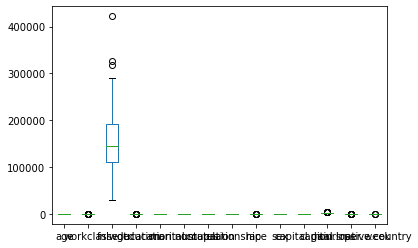

In [2295]:
#See outliers through boxplots
df.plot(kind = 'box', sharex = False, sharey = False)
plt.show()

In [2296]:
# Tukey Method

n = 2 #In this case, we considered outliers as rows that have at least two outlied numerical values. The optimal value for this parameter can be later determined though the cross-validation
indexes = []

for col in df.columns[0:14]:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1
    
    limit = 1.5 * IQR

    list_outliers = df[(df[col] < Q1 - limit) | (df[col] > Q3 + limit )].index # Determine a list of indices of outliers for feature col
    
    indexes.extend(list_outliers) # append the found outlier indices for col to the list of outlier indices 

indexes = Counter(indexes)        
multiple_outliers = list( k for k, v in indexes.items() if v > n )

df.drop(multiple_outliers, axis = 0)

df = df.drop(multiple_outliers, axis = 0).reset_index(drop=True)
print(str(len(multiple_outliers)) + " outliers were eliminated")

3 outliers were eliminated


In [2297]:
#You can try with this method to see if it provides better results
"""
#Setting the min/max to outliers using standard deviation
for col in df.columns[0:14]:
    factor = 3 #The optimal value for this parameter can be later determined though the cross-validation
    upper_lim = df[col].mean () + df[col].std () * factor
    lower_lim = df[col].mean () - df[col].std () * factor

    df = df[(df[col] < upper_lim) & (df[col] > lower_lim)]
"""

'\n#Setting the min/max to outliers using standard deviation\nfor col in df.columns[0:14]:\n    factor = 3 #The optimal value for this parameter can be later determined though the cross-validation\n    upper_lim = df[col].mean () + df[col].std () * factor\n    lower_lim = df[col].mean () - df[col].std () * factor\n\n    df = df[(df[col] < upper_lim) & (df[col] > lower_lim)]\n'

## Dealing with imbalanced data

income
<=50K    18
>50K     29
dtype: int64

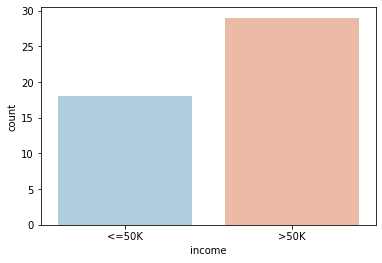

In [2298]:
#Check if there are labels imbalance
sns.countplot(x=df['income'],palette='RdBu_r')
df.groupby('income').size()

In [2299]:
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

Y = df['income']
X = df.drop('income',axis=1)

### Oversampling the data **

In [2300]:
# Oversampling using smote 
smk = SMOTETomek(random_state = 42)
X, Y = smk.fit_sample(X, Y)

"""
# RANDOM Oversample #####
os = RandomOverSampler() #ratio of one feature and another is 50% and 50% respectively
X, Y = os.fit_sample(X, Y)
"""

'\n# RANDOM Oversample #####\nos = RandomOverSampler() #ratio of one feature and another is 50% and 50% respectively\nX, Y = os.fit_sample(X, Y)\n'

In [2301]:
#If dowsample was needed...

"""
# RANDOM Undersample #####
os = RandomUnderSampler() #ratio of one feature and another is 50% and 50% respectively
X, Y = os.fit_sample(X, Y)
"""

"""
#Using nearmiss
nm = NearMiss()
X, Y = nm.fit_sample(X, Y)
"""

'\n#Using nearmiss\nnm = NearMiss()\nX, Y = nm.fit_sample(X, Y)\n'

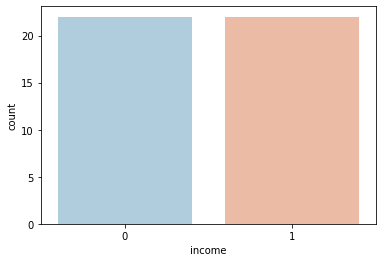

In [2302]:
#making sure that everything is good now
df = pd.concat([X, Y], axis=1)
sns.countplot(x=Y,palette='RdBu_r')

## Transforming Skewed Continuous Features

In [2303]:
def analyze_skew():
    #analyze which features are skewed
    fig = plt.figure(figsize = (15,10))
    cols = 3
    rows = math.ceil(float(df[numerical].shape[1] / cols))
    for i, column in enumerate(numerical):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            df[column].value_counts().plot(kind = 'bar', axes = ax)
        else:
            df[column].hist(axes = ax)
            plt.xticks(rotation = 'vertical')
    plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
    plt.show()
    
    # from the plots we can see that there are multiple features skewed. However, the following procedure allows us to see in detail how skewed are they.
    skew_feats = df[numerical].skew().sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew': skew_feats})
    
    display(skewness)

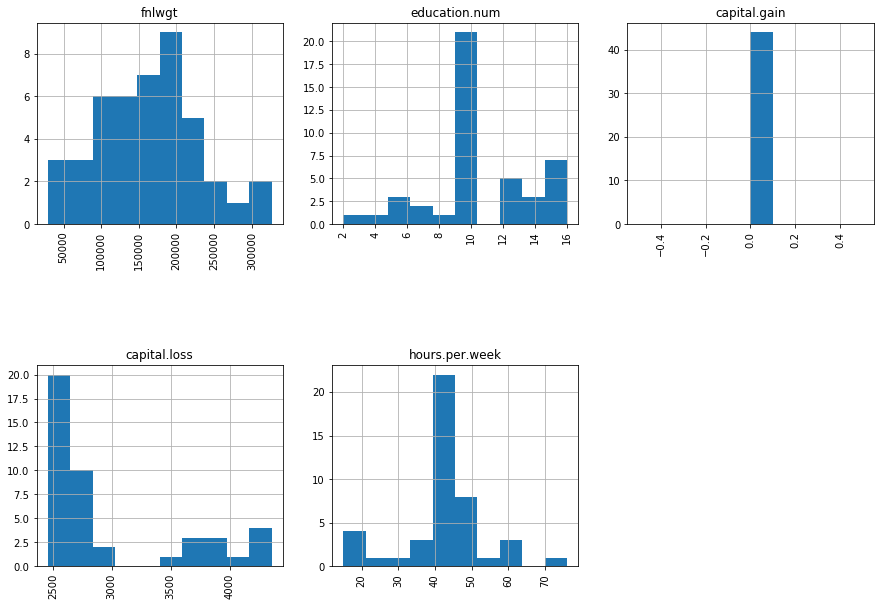

,Skew
capital.loss,1.099829
fnlwgt,0.228080
capital.gain,0.000000
hours.per.week,-0.105541
education.num,-0.134685


In [2304]:
analyze_skew()

In [2305]:
#Let's reduce the skew of fnlwgt, capital.gain, capital.loss
skewed = ['fnlwgt', 'capital.gain', 'capital.loss']
features_log_transformed = pd.DataFrame(data=df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1)) #it can be other function like polynomial, but generally the log funtion is suitable

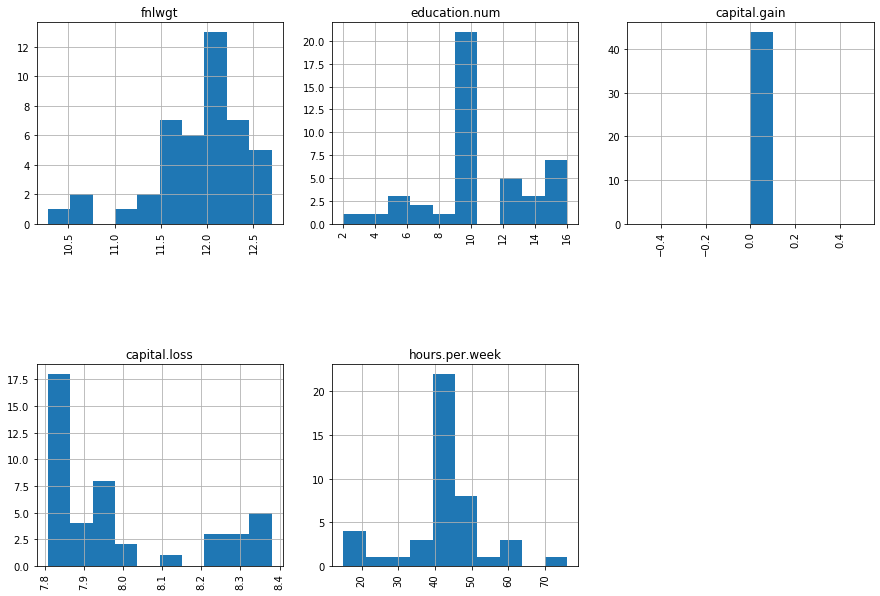

,Skew
capital.loss,0.969366
capital.gain,0.000000
hours.per.week,-0.105541
education.num,-0.134685
fnlwgt,-1.186394


In [2306]:
#check again if is everything ok
analyze_skew()

# Feature Selection
- Feature Selection/Reduction (Remove useless features) -> See feature importance, correlations, Dimensionality reduction,

As we only have 14 features, we are not pressured to make a feature selection/reduction in order to increase drastically the computing time of the algorithms. So, for now, we are going to investigate if there are features extremely correlated to each other. After tuning and choosing the best model, we are revisiting feature selection methods just in case we face overfitting or to see if we could achieve the same results with the chosen model but with fewer features.

## Correlation

###
#Simple regression line of various variables in relation to  one other
sns.pairplot(X, x_vars = ['capital.loss', 'hours.per.week', 'education.num'], y_vars = 'age', size = 7, aspect = 0.7, kind = 'reg')

###
# Correlation between variables each other. It may take a while, not advised if there are plenty of features
sns.pairplot(data = X)

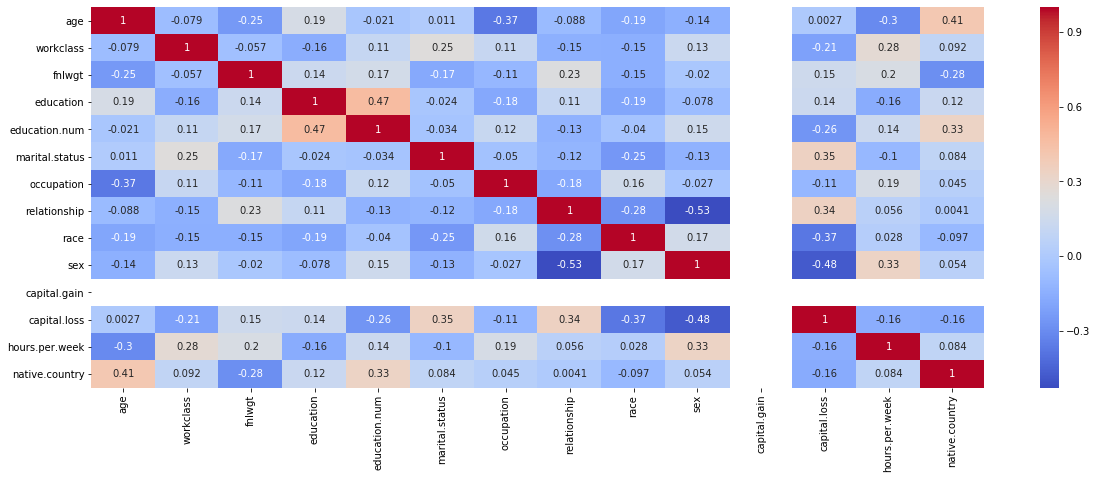

In [2307]:
plt.subplots(figsize=(20,7))
sns.heatmap(X.corr(method = 'pearson'),annot=True,cmap='coolwarm') # the method can also be 'spearman' or kendall'

#to see the correlation between just two variables
#df['age'].corr(df['capital.gain']) 

**Generally all of the features are not highly correlated (no correlations above abs(0.5)). The strongest correlations here is "sex"vs"relationship". Down bellow are the procedures to drop the highest correlated features, even though it's not needed in this case or it might even result in worse results. Let's proceed with PCA and Backward Elimination methods to really see if it is needed or not**

## PCA

In [2308]:
#Scalling first a copy of the data
X_copy = X
col_names = X_copy.columns
features = X_copy[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X_copy[col_names] = features

n_comp = len(X_copy.columns)

pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X_copy)

print('Variance contributions of each feature:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

Variance contributions of each feature:
0.19402383541833598
0.1486006080606339
0.1305015550909564
0.1181592462726334
0.08803729515245977
0.08340029268871814
0.055375793802250405
0.048163738898613175
0.04151690253938525
0.03561019175757017
0.024047017563473064
0.020469815689388337
0.012093707065582044
2.9455635678700548e-34


As we can see, every feature has a meaningful contribution to variance. So there's no need to use PCA-componentes. Anyway, we can render the graph to see how the pca-components data look like.

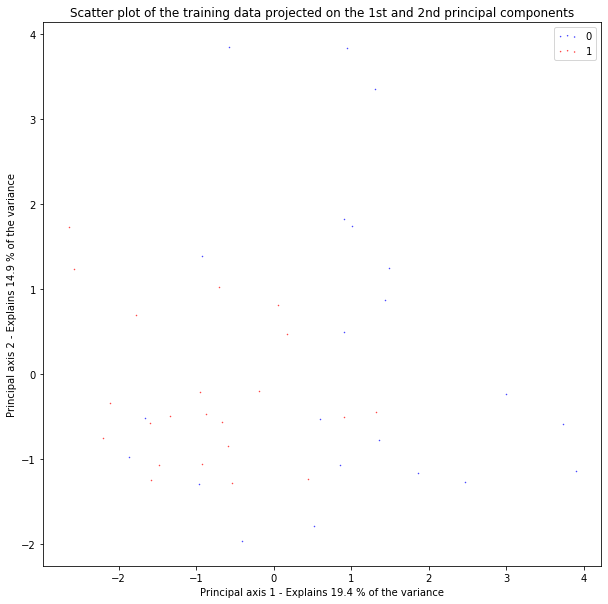

In [2309]:
colors = ['blue', 'red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], np.unique(Y)):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))



plt.show()

In [2310]:
#Making the feature reduction if it was actually needed
#X = pd.DataFrame(data = pca_train, columns = ['pca-1', 'pca-2'])

## BACKWARD ELIMINATION (wrapper method 1)

- 1) We select a significance level (SL) to stay in the model
- 2) Fit the full model with all possible predictors
- 3) Loop (while p-value < SL)
    - 4) Consider the predictor with highest p-value. 
    - 5) Remove the predictor
    - 6) Fit model without this variable
    
So basically we are feeding all the possible features to the model and then proceed to iteratively remove 
the worst performing features one by one. The metric to evaluate feature performance is pvalue above 0.05 (to keep the feature).

In [2311]:
pmax = 1
SL = 0.05 # the smaller the SL, the more features will be removed
cols = list(X.columns)
while (len(X.columns) > 0):
    
    p_values = []
    
    Xtemp = X[cols]
    Xtemp = sm.add_constant(Xtemp)
    model = sm.OLS(Y,Xtemp).fit()
    
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    p_max = max(p)
    feature_pmax = p.idxmax()
    
    if(p_max > SL):
        cols.remove(feature_pmax)
    else:
        break

print('A total of {} features selected: {}'.format(len(cols), cols))

#to apply feature reduction
#X = X[cols]

A total of 5 features selected: ['education', 'education.num', 'relationship', 'sex', 'capital.gain']


Backward elimination actually tells us that we can eliminate the feature native.country. However, as we have just a few features, we don't have the urge to sacrifice a little bit of the accuracy of the model due to performing speed. In the latter parts of this notebook there are shown more advanced feature selection techniques just in case will be needed in the future.

# Base Line Model

In [2312]:
l=pd.DataFrame(Y)
l['baseline'] = 0
k = pd.DataFrame(confusion_matrix(Y,l['baseline']))
print(k)
print("Accuracy: " + str(accuracy_score(Y, l['baseline'])))

"""
#If we just want to perform OLS regression to find out interesting stats:
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
display(model.summary())
print(model.pvalues)
"""

    0  1
0  22  0
1  22  0
Accuracy: 0.5


'\n#If we just want to perform OLS regression to find out interesting stats:\nX1 = sm.add_constant(X)\nmodel = sm.OLS(Y, X1).fit()\ndisplay(model.summary())\nprint(model.pvalues)\n'

# One Hot Encoding

In [2313]:
encoded_feat = pd.DataFrame(OneHotEncoder(categories="auto").fit_transform(df[categorical]).toarray())

#concatenate without adding null values -.-''
l1=encoded_feat.values.tolist()
l2=df[numerical].values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])

X=pd.DataFrame(l1,columns=encoded_feat.columns.tolist()+df[numerical].columns.tolist())


# Scaling Normalization

StandardScaler removes the mean and scales the data to unit variance. However, the outliers have an influence when computing the empirical mean and standard deviation which shrink the range of the feature values as shown in the left figure below. Note in particular that because the outliers on each feature have different magnitudes, the spread of the transformed data on each feature is very different: most of the data lie in the [-2, 4] range for the transformed median income feature while the same data is squeezed in the smaller [-0.2, 0.2] range for the transformed number of households.

StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] as shown in the right panel below. However, this scaling compress all inliers in the narrow range [0, 0.005] for the transformed number of households.

[Source](https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler)

In [2314]:
#Standard
col_names = X.columns

features = X[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

X[col_names] = features

In [2315]:
#you can try this one to see if it results in better performances
"""
#Minimax
col_names = X.columns

features = X[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

X[col_names] = features
"""

'\n#Minimax\ncol_names = X.columns\n\nfeatures = X[col_names]\n\nscaler = MinMaxScaler().fit(features.values)\nfeatures = scaler.transform(features.values)\n\nX[col_names] = features\n'

# Split Data

### Shuffle before split

In [2316]:
l1=X.values.tolist()
l2=pd.DataFrame(Y).values.tolist()
for i in range(len(l1)):
    l1[i].extend(l2[i])

new_df=pd.DataFrame(l1,columns=X.columns.tolist()+pd.DataFrame(Y).columns.tolist())

new_df = shuffle(new_df, random_state=42)

In [2317]:
testSize = 0.3 #we can try with different test_sizes

train,test = train_test_split(new_df,test_size=testSize)

y_train = train['income']
X_train = train.drop('income',axis=1)
y_test = test['income']
X_test = test.drop('income',axis=1)

# Building Classifiers and Finding their Best Parameters
Just tuning the crutial parameters, not all of them.
I intercalate between randomizedSearch and GridSearch to diversify

In [2318]:
models = []
###tuning_num_folds = 5
tuning_num_folds = 2
jobs=4
num_random_state=10
scoring_criteria='accuracy'
predictions = pd.DataFrame()

## Random Forest Tuning

In [2319]:
name = 'Random Forest'
params ={
             'max_depth': st.randint(3, 11),
            'n_estimators': [50,100,250]
            }

""" #due to lack of computational power, the parameters supposed to tune were diminished
params ={
             'max_depth': st.randint(3, 11),
            'n_estimators': [50,100,150,200,250],
             'max_features':["sqrt", "log2"],
             'max_leaf_nodes':st.randint(6, 10)
            }
            
#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

skf = StratifiedKFold(n_splits=tuning_num_folds, shuffle = True)

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=jobs, cv=skf.split(X_train,y_train), verbose=3, random_state=num_random_state)
random_search.fit(X_train,y_train)

tunned_model = RandomForestClassifier(n_estimators=random_search.best_params_['n_estimators'], max_depth=random_search.best_params_['max_depth'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))    

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   30.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   30.6s finished


## Tuning Logistic Regression

In [2320]:
name = 'Logistic Regression'

C_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']
param = {'penalty': penalties, 'C': C_vals}

""" #due to lack of computational power, the parameters supposed to tune were diminished
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']
param = {'penalty': penalties, 'C': C_vals}

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

grid = GridSearchCV(LogisticRegression(), param,verbose=False, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))    

## MLPClassifier tuning




In [2321]:
name = 'MLP'

param ={
             'activation':['logistic', 'tanh', 'relu'],
             'learning_rate': ['adaptive'],
}

""" #due to lack of computational power, the parameters supposed to tune were diminished
param ={'max_iter': np.logspace(1, 5, 10).astype("int32"),
             'hidden_layer_sizes': np.logspace(2, 3, 4).astype("int32"),
             'activation':['identity', 'logistic', 'tanh', 'relu'],
             'learning_rate': ['adaptive'],
             'early_stopping': [True],
             'alpha': np.logspace(2, 3, 4).astype("int32")
}

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

grid = GridSearchCV(MLPClassifier(), param,verbose=True, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = MLPClassifier(activation=grid.best_params_['activation'], learning_rate=grid.best_params_['learning_rate'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))    

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    3.3s finished


## KNeighborsClassifier tuning

In [2322]:
name = 'KNN'
params ={###'n_neighbors': [5, 15,35],
            'n_neighbors': [1],
            'weights':['uniform','distance']
            }

""" #due to lack of computational power, the parameters supposed to tune were diminished
params ={'n_neighbors': st.randint(5,50),
            'weights':['uniform','distance']
            }
}

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

skf = StratifiedKFold(n_splits=tuning_num_folds, shuffle = True)

random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=jobs, cv=skf.split(X_train,y_train), verbose=3, random_state=num_random_state)
random_search.fit(X_train,y_train)

tunned_model = KNeighborsClassifier(n_neighbors=random_search.best_params_['n_neighbors'], weights=random_search.best_params_['weights'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))      

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


## Linear Discriminant tuning

In [2323]:
name = 'LDA'

param={'solver': ['svd', 'lsqr', 'eigen']}

grid = GridSearchCV(LinearDiscriminantAnalysis(), param,verbose=True, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = LinearDiscriminantAnalysis(solver=grid.best_params_['solver'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))     

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    0.1s finished


## DecisionTreeClassifier tuning

Since each split in the decision tree distinguishes the dependent variable, splits closer to the root, aka starting point, have optimally been determined to have the greatest splitting effect. The feature importance graphic measures how much splitting impact each feature has. It is important to note that this by no means points to causality, but just like in hierarchical clustering, does point to a nebulous groups. Furthermore, for ensemble tree methods, feature impact is aggregated over all the trees.

In [2324]:
name = 'DT'
param = {'min_samples_split': [4,7,10,12]}

grid = GridSearchCV(DecisionTreeClassifier(), param,verbose=True, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=10, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
           

In [2325]:
"""
# Helper Function to visualize feature importance if needed
plt.rcParams['figure.figsize'] = (8, 4)
predictors = [x for x in X.columns]
def feature_imp(model):
    MO = model.fit(X_train, y_train)
    feat_imp = pd.Series(MO.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
"""


"\n# Helper Function to visualize feature importance if needed\nplt.rcParams['figure.figsize'] = (8, 4)\npredictors = [x for x in X.columns]\ndef feature_imp(model):\n    MO = model.fit(X_train, y_train)\n    feat_imp = pd.Series(MO.feature_importances_, predictors).sort_values(ascending=False)\n    feat_imp.plot(kind='bar', title='Feature Importances')\n    plt.ylabel('Feature Importance Score')\n"

**Pruning the decision trees**

Adapted from [here](https://stackoverflow.com/questions/49428469/pruning-decision-trees)

In [2326]:
"""traverse the tree and remove all children of the nodes with minimum class count less than 5  (or any other condition you can think of)."""
def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)



In [2327]:

tunned_model = DecisionTreeClassifier(min_samples_split=grid.best_params_['min_samples_split'])
tunned_model = tunned_model.fit(X_train,y_train)
prune_index(tunned_model.tree_, 0, 5)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))    

## SVC tuning

In [2328]:
name = 'SVC'
param={'C':[0.1,0.5, 1,1.3,1.5],
      'kernel': ["linear","rbf"]
      }

""" #due to lack of computational power, the parameters supposed to tune were diminished
param={'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5],
      'kernel': ["linear","rbf"]
      }

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

grid = GridSearchCV(SVC(), param,verbose=True, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = SVC(C=grid.best_params_['C'], kernel=grid.best_params_['kernel'], probability=True)
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.0s finished


## SGDClassifier tuning

In [2329]:
name = 'SGD'
param ={'loss':["log","modified_huber"]} #the other available methods do not enable predict_proba that we need later for roc curves and soft voter

""" #due to lack of computational power, the parameters supposed to tune were diminished
param ={'loss':["log","modified_huber","epsilon_insensitive","squared_epsilon_insensitive"]}

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

grid = GridSearchCV(SGDClassifier(), param,verbose=False, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = SGDClassifier(loss=grid.best_params_['loss'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

## Boosting

### GradientBoostingClassifier tuning

In [2330]:
name = 'GraBoost'
param_grid ={
            'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1, 0.01,0.05,0.001],
            }

""" #due to lack of computational power, the parameters supposed to tune were diminished
param_grid ={'n_estimators': st.randint(100, 800),
            'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1, 0.01,0.05,0.001],
            'max_depth': np.arange(2, 12, 1)}
#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

random_search = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=param_grid, scoring='roc_auc', n_jobs=jobs, cv=skf.split(X_train,y_train), verbose=3, random_state=num_random_state)
random_search.fit(X_train,y_train)

tunned_model = GradientBoostingClassifier( loss=random_search.best_params_['loss'], learning_rate=random_search.best_params_['learning_rate'], verbose=0)
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    3.6s finished


### AdaBoostClassifier tuning

In [2331]:
name = 'AdaBoost'
params ={'n_estimators':st.randint(100, 400),
        'learning_rate':np.arange(.1, 4, .5)}

""" #due to lack of computational power, the parameters supposed to tune were diminished
params ={'n_estimators':st.randint(100, 800),
        'learning_rate':np.arange(.1, 4, .5)}

#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""

random_search = RandomizedSearchCV(AdaBoostClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=jobs, cv=skf.split(X_train,y_train), verbose=3, random_state=num_random_state)
random_search.fit(X_train,y_train)

tunned_model = AdaBoostClassifier(n_estimators=random_search.best_params_['n_estimators'], learning_rate=random_search.best_params_['learning_rate'])
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   15.3s finished


### XGBClassifier Tuning

In [2332]:
name = 'XGB'
params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }

""" #due to lack of computational power, the parameters supposed to tune were diminished
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
#remember that the line tunned_model = ... needs to be adjusted depending on the parameters that you include
"""


skf = StratifiedKFold(n_splits=tuning_num_folds, shuffle = True)

random_search = RandomizedSearchCV(XGBClassifier(), param_distributions=params, scoring='roc_auc', n_jobs=jobs, cv=skf.split(X_train,y_train), verbose=3, random_state=num_random_state)
random_search.fit(X_train,y_train)

tunned_model = XGBClassifier(gamma=random_search.best_params_['gamma'], max_depth=random_search.best_params_['max_depth'], verbose=0)
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    9.5s finished


In [2333]:
name = 'Naive Bayes'
tunned_model = GaussianNB()
tunned_model = tunned_model.fit(X_train,y_train)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

### CatBoostClassifier Tuning

In [2334]:
name = 'CAT'
param = {'iterations': [100, 150], 'learning_rate': [0.3, 0.4, 0.5]}

grid = GridSearchCV(CatBoostClassifier(), param,verbose=True, cv = StratifiedKFold(n_splits=tuning_num_folds,random_state=num_random_state,shuffle=True), n_jobs=jobs,scoring=scoring_criteria)
grid.fit(X_train,y_train)

tunned_model = CatBoostClassifier(iterations=grid.best_params_['iterations'], learning_rate=grid.best_params_['learning_rate'], verbose=0)
tunned_model = tunned_model.fit(X_train,y_train, verbose=0)

models.append((name, tunned_model))

#let's save the predictions to analyze later their correlation
predictions[name] = tunned_model.predict(X_test)

#saving model
pickle.dump(tunned_model, open('./models/' + name + '_model.sav', 'wb'))  

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  1.1min finished


0:	learn: 0.3459739	total: 3.98ms	remaining: 394ms
1:	learn: 0.1943242	total: 9.93ms	remaining: 486ms
2:	learn: 0.1401250	total: 16.7ms	remaining: 540ms
3:	learn: 0.1083405	total: 32.7ms	remaining: 784ms
4:	learn: 0.0838241	total: 35.8ms	remaining: 680ms
5:	learn: 0.0669357	total: 38.9ms	remaining: 609ms
6:	learn: 0.0468992	total: 51.5ms	remaining: 685ms
7:	learn: 0.0393448	total: 60.2ms	remaining: 692ms
8:	learn: 0.0343997	total: 63.4ms	remaining: 641ms
9:	learn: 0.0302616	total: 67ms	remaining: 603ms
10:	learn: 0.0274027	total: 74.1ms	remaining: 599ms
11:	learn: 0.0237938	total: 81.5ms	remaining: 598ms
12:	learn: 0.0218147	total: 86.8ms	remaining: 581ms
13:	learn: 0.0197449	total: 92.1ms	remaining: 566ms
14:	learn: 0.0181666	total: 106ms	remaining: 600ms
15:	learn: 0.0170248	total: 112ms	remaining: 586ms
16:	learn: 0.0161399	total: 115ms	remaining: 561ms
17:	learn: 0.0150168	total: 122ms	remaining: 556ms
18:	learn: 0.0141485	total: 127ms	remaining: 540ms
19:	learn: 0.0133894	total: 1

## Ensemble Methods

**Studying Correlation**
If base models' predictions are weakly correlated with each other, the ensemble will likely to perform better. On the other hand, for a strong correlation of predictions among the base models, the ensemble will unlikely to perform better. 

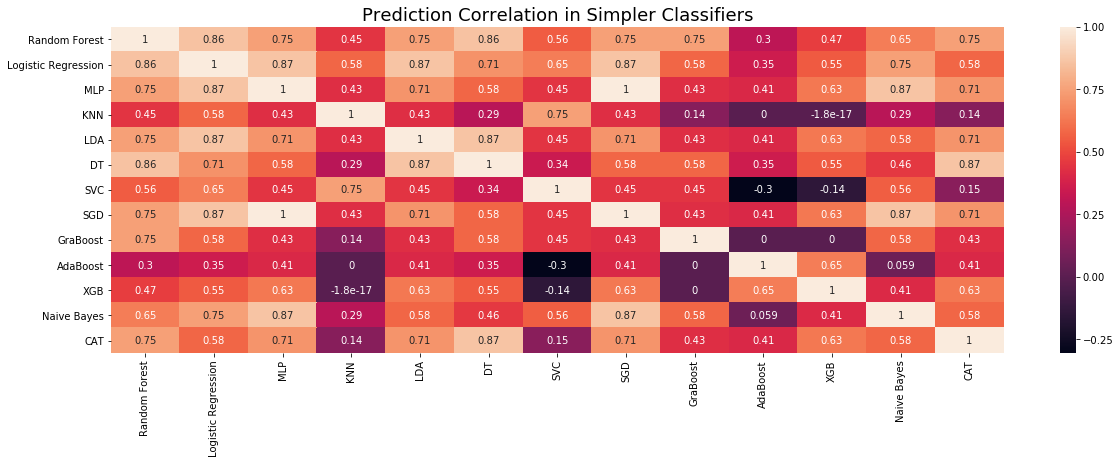

In [2335]:
plt.figure(figsize = (20, 6))
correlations = predictions.corr()
sns.heatmap(correlations, annot = True)
plt.title('Prediction Correlation in Simpler Classifiers', fontsize = 18)
plt.show()

**As we can see, there are some classifiers that have a high correlated predictions. So, we won't use them to form the ensemble models.**

In [2338]:
classifiers = copy.deepcopy(models)
for i in range(0, len(correlations.columns)):
    for j in range(0, len(correlations.columns)):
        if j>=i:
            break
        else:
            if abs(correlations.iloc[i,j]) >= 0.85:
                for index, clf in enumerate(classifiers):
                    if correlations.columns[j] == clf[0]:
                        del classifiers[index]
                
classifiers = [i[1] for i in classifiers]
display(classifiers)

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'),
 SVC(C=1.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            rand

### Voting

Voting can be subdivided into hard voting and soft voting.

Hard voting is purely atributing the majority class from the predictions of all the classifiers.

Soft voting is useful when we have probabilities as output of the classifiers, so we average those values and assume the class that it's close to the probability.

We are going to do just soft voting because it takes into account how certain each voter is, rather than just a binary input from the voter...so, theoretically, it's better.

In [1924]:
def soft_voting(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):
    
    copy_1 = average_results[average_results.Model.isin([i[0] for i in models])]
    copy_1.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
    
    numb_voters = np.arange(2,len(classifiers)+1,1)
    
    #we we'll try to ensemble the best two classifiers, then the best three, the best, four, etc
    for i in numb_voters:
        models_names = list(copy_1.iloc[0:i,0])
        voting_models = []
        for model1 in models_names:
            for model2 in models[:-1]:
                if model2[0] == model1:
                    voting_models.append(model2[1])
                    
        soft_vct = EnsembleVoteClassifier(clfs = voting_models, voting = 'soft') 
        model = soft_vct.fit(X_train,Y_train)
        
        name = "SoftVoter_" + str(i) + "_best"
        ###check_fitting(model, name)
        
        pickle.dump(model, open('./models/' + name + '_model.sav', 'wb'))
        average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies = classify_performance(name, model, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)
        
    return average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies

In [1925]:
#To apply Hard Voting, here's the code anyway
"""
def hard_voting(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):
    
    copy_1 = average_results[average_results.Model != 'CAT']
    copy_1 = copy_1[copy_1.Model.isin([i[0] for i in models])]
    copy_1.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)

    classifiers_voting = classifiers[:-1]
    
    #Hard-Voting
    numb_voters = np.arange(2,len(classifiers_voting)+1,1) #if catboost counted, it would be len(classifiers)+1
    
    all_test_accuracy = []
    all_y_pred = []
    
    #we we'll try to ensemble the best two classifiers, then the best three, the best, four, etc
    for i in numb_voters:
        models_names = list(copy_1.iloc[0:i,0])
        voting_models = []
        for model1 in models_names:
            for model2 in models[:-1]:
                if model2[0] == model1:
                    voting_models.append(model2[1])
                    
        hard_vct = EnsembleVoteClassifier(clfs = voting_models, voting = 'hard') 
        model = hard_vct.fit(X_train,Y_train)
        
        name = "HardVoter_" + str(i) + "_best"
        ###check_fitting(model, name)
        
        pickle.dump(model, open('./models/' + name + '_model.sav', 'wb'))
        average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies = classify_performance(name, model, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)
        
    return average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies
"""

'\ndef hard_voting(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):\n    \n    copy_1 = average_results[average_results.Model != \'CAT\']\n    copy_1 = copy_1[copy_1.Model.isin([i[0] for i in models])]\n    copy_1.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)\n\n    classifiers_voting = classifiers[:-1]\n    \n    #Hard-Voting\n    numb_voters = np.arange(2,len(classifiers_voting)+1,1) #if catboost counted, it would be len(classifiers)+1\n    \n    all_test_accuracy = []\n    all_y_pred = []\n    \n    #we we\'ll try to ensemble the best two classifiers, then the best three, the best, four, etc\n    for i in numb_voters:\n        models_names = list(copy_1.iloc[0:i,0])\n        voting_models = []\n        for model1 in models_names:\n            for model2 in models[:-1]:\n                if model2[0] == model1:\n                    voting_models.append(model2[

### Bagging (Bootstrapping Aggregation)

Bagging is characteristic of random forest. You bootstrap or subdivide the same training set into multiple subsets or bags. This steps is also called row sampling with replacement. Each of these training bags will feed a mmodel to be trained. After each model being trained, it is time for aggragation, in other orders, to predict the outcome based on a voting system of each model trained.

In [1926]:
def bagging(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):

    random_forest_classifier = RandomForestClassifier() # is the random forest classifier

    bagg = BaggingClassifier(base_estimator = random_forest_classifier, verbose = 0, n_jobs = -1, random_state = seed)

    model = bagg.fit(X_train, Y_train)
    name = "bagging"
    
    ###check_fitting(model, name)
    
    pickle.dump(model, open('./models/' + name + '_model.sav', 'wb'))
    
    return classify_performance(name, model, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)
    
    

### Blending

In [1927]:
def blending(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):
    
    copy_2 = average_results[average_results.Model.isin([i[0] for i in models])]
    copy_2.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
    
    numb_voters = np.arange(2,len(classifiers)+1,1)

    #we we'll try to ensemble the best two classifiers, then the best three, the best, four, etc
    for i in numb_voters:
        models_names = list(copy_2.iloc[0:i,0])
        blending_models = []
        for model1 in models_names:
            for model2 in models:
                if model2[0] == model1:
                    blending_models.append(model2[1])
        
        blend = BlendEnsemble(n_jobs = -1, test_size = 0.5, random_state = seed)
        blend.add(blending_models, proba=True) #proba=true s important in order to predict_proba function properly later
        blend.add_meta(RandomForestClassifier())
        model = blend.fit(X_train, Y_train)
        name = "blending_" + str(i) + "_best"
        ###check_fitting(model, name)
        pickle.dump(model, open('./models/' + name + '_model.sav', 'wb'))
        
        average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies = classify_performance(name, model, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)

        
    return average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies


### Stacking

Shortly, we are trying to fit a model upon Y_valid data and models' predictions (stacked) made during the validation stage. Then, we will try to predict from the models' predictions (stacked) of test data to see if we reach Y_test values.

In [1928]:
def stacking_function(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring):
    numb_voters = np.arange(2,len(classifiers)+1, 1)

    S_train, S_test = stacking(classifiers, X_train, Y_train, X_test, regression = False, mode = 'oof_pred_bag', needs_proba = False, save_dir = None,metric = accuracy_score, n_folds = num_folds, stratified = True, shuffle = True, random_state =  seed, verbose = 0)                

    super_learner = RandomForestClassifier()
    model_1 = super_learner.fit(S_train, Y_train)
    name = "stacking"
    ###check_fitting(model, name)
    pickle.dump(model, open('./models/' + name + '_model.sav', 'wb'))
    
    return classify_performance(name, model_1, S_train, S_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)




# Runs
**First of all, we'll execute 30 tests of cross-validation of all the models but with different seeds.**

In [1929]:
def check_fitting(model, name):
    
    plt.figure(figsize = (12,8))

    ###number_chunks = 40
    number_chunks = 10
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, 
                                            train_sizes = np.linspace(0.01, 1.0, number_chunks), cv = 10, scoring = 'accuracy', 
                                            n_jobs = -1, random_state = 0)
    
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  

    plt.plot(train_sizes, train_mean, '*-', color = 'blue',  label = 'Training score')
    plt.plot(train_sizes, test_mean, '*-', color = 'yellow', label = 'Cross-validation score')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'b') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'y')
    
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()
    
    plt.suptitle('Check for Overfitting/Underfitting Issues of ' + name + ' When Submited to Different Training Sizes', fontsize = 15)
    plt.tight_layout(rect = [0, 0.03, 1, 0.97])
    Path("./results/" + name).mkdir(parents=True, exist_ok=True)

    #saving the image
    plt.savefig('./results/' + name + '/learning_curve.png')
    plt.show()

In [1930]:
def classify_performance(name, model, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies):
    stratifiedfold = StratifiedShuffleSplit(n_splits=num_folds, random_state=seed)
    
    cv_results = cross_validate(model, X_train, Y_train, cv=stratifiedfold, scoring=scoring, verbose=0, return_train_score=True)
    print("%s - Train: Accuracy mean - %.3f, Precision: %.3f, Recall: %.3f." % (name, cv_results['train_accuracy'].mean(), cv_results['train_precision'].mean(), cv_results['train_recall'].mean()))
    
    ###if seed == 0: #check the learning curve for underfittinf/overfitting issues. It is just needed on the first try
        ###check_fitting(model, name)
    
    pred_proba = model.predict_proba(X_test)
    if (pred_proba[0].size == 1 ): #just in case that probabilities are not correctly retrieved
        pred_proba = pred_proba.T
    else:
        pred_proba = pred_proba[:, 1]
    
    y_pred =  [round(x) for x in pred_proba]
    
    precision, recall, fscore, support = precision_recall_fscore_support(Y_test, y_pred,average='binary')
    test_accuracy = accuracy_score(Y_test, y_pred)
    
    print("%s - Test: Accuracy - %.3f, Precision: %.3f, Recall: %.3f, F-Score: %.3f" % (name, test_accuracy, precision,recall, fscore))
    
    fpr, tpr, thresholds1 = roc_curve(Y_test, pred_proba)
    pre, rec, thresholds2 = precision_recall_curve(Y_test, pred_proba)
    roc_auc = auc(fpr, tpr)
    
    TP = FP = TN = FN = 0
    for i in range(len(y_pred)): 
        if ((y_pred[i] == 1) and (list(Y_test)[i] == y_pred[i])):
            TP += 1
        if y_pred[i]==1 and list(Y_test)[i]!=y_pred[i]:
            FP += 1
        if y_pred[i]==0 and list(Y_test)[i]==y_pred[i]:
            TN += 1
        if y_pred[i]==0 and list(Y_test)[i]!=y_pred[i]:
            FN += 1
        
    new_entry = {'Model': name,
                 'Test Accuracy': test_accuracy, 
                 'Test Precision': precision, 
                 'Test Recall': recall, 
                 'Test F-Score': fscore, 
                 'AUC': roc_auc,
                 'TPR': tpr,
                 'FPR': fpr,
                 'TP': TP,
                 'FP': FP,
                 'TN': TN,
                 'FN': FN,
                 'Train Accuracy':cv_results['train_accuracy'].mean(), 
                 'Train Precision': cv_results['train_precision'].mean(), 
                 'Train Recall': cv_results['train_recall'].mean(),
                 'Validation Accuracy':cv_results['test_accuracy'].mean(), 
                 'Validation Precision': cv_results['test_precision'].mean(), 
                 'Validation Recall': cv_results['test_recall'].mean(),
                 'PRE': pre,
                 'REC': rec
                }

   
    for key, value in new_entry.items():
        if key != 'Model':
           
            if key == 'TPR' or key == 'FPR' or key == 'PRE' or key =='REC':
                current = average_results.ix[average_results['Model'] == name][key].values
                
                if type(current[0]) == int:
                    average_results.iloc[average_results.ix[average_results['Model'] == name].index.values.astype(int)[0]][key] = value
                else:
                    summed = list(map(add, current[0], list(value)))
                    average_results.iloc[average_results.ix[average_results['Model'] == name].index.values.astype(int)[0]][key] = summed
            else:

                average_results.iloc[average_results.ix[average_results['Model'] == name].index.values.astype(int)[0]][key] = float(average_results.ix[average_results['Model'] == name][key].values) + value
            
            models_test_accuracies.iloc[seed, :][name] = test_accuracy
            models_train_accuracies.iloc[seed, :][name] = cv_results['train_accuracy'].mean()
            models_validation_accuracies.iloc[seed, :][name] = cv_results['test_accuracy'].mean()
            
    return average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies


In [2339]:
# RUNNING ALL THE EXPERIMENTS

#### num_experiments = 30
### num_folds = 10
num_experiments = 2
num_folds = 2
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro'}


all_models = [i[0] for i in models]

for i in np.arange(2,len(classifiers)+1,1):
              all_models.append("blending_" + str(i) + "_best")

all_models.append("bagging")

for i in np.arange(2,len(classifiers)+1,1):
              all_models.append("SoftVoter_" + str(i) + "_best")

all_models.append("stacking")

models_test_accuracies = pd.DataFrame(columns=all_models)
models_train_accuracies = pd.DataFrame(columns=all_models)
models_validation_accuracies = pd.DataFrame(columns=all_models)

average_results = pd.DataFrame(columns=['Model',
                                        'Test Accuracy',
                                        'Test Precision',
                                        'Test Recall',
                                        'Test F-Score',
                                        'AUC',
                                        'TPR',
                                        'FPR',
                                        'TP',
                                        'FP',
                                        'TN',
                                        'FN',
                                        'Train Accuracy',
                                        'Train Precision',
                                        'Train Recall',
                                        'Validation Accuracy',
                                        'Validation Precision', 
                                        'Validation Recall',
                                        'PRE',
                                        'REC'
                                        ]
                              )

for i, elem in enumerate(all_models):
    average_results = average_results.append(pd.Series(0, index=average_results.columns), ignore_index=True)
    average_results.ix[i,:]['Model'] = elem

for i in range(0, num_experiments):
    print("\n------------------------------- EXPERIMENT " + str(i+1) + " ------------------------------------")
    
    seed = i
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,random_state=seed)
    
    models_train_accuracies = models_train_accuracies.append(pd.Series(0, index=models_train_accuracies.columns), ignore_index=True)
    models_validation_accuracies = models_validation_accuracies.append(pd.Series(0, index=models_validation_accuracies.columns), ignore_index=True)
    models_test_accuracies = models_test_accuracies.append(pd.Series(0, index=models_test_accuracies.columns), ignore_index=True)
    
    #simpliest models
    for name, model_2 in models:
        average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies = classify_performance(name, model_2, X_train, X_test, Y_train, Y_test, num_folds, scoring, seed, average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies)

    #ensemble models
    average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies  = bagging(average_results, models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring)

    average_results,models_test_accuracies,models_train_accuracies, models_validation_accuracies  = blending(average_results,  models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring)
    
    average_results,models_test_accuracies,models_train_accuracies, models_validation_accuracies  = soft_voting(average_results,  models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring)
    
    average_results,models_test_accuracies, models_train_accuracies, models_validation_accuracies  = stacking_function(average_results,  models_test_accuracies, models_train_accuracies, models_validation_accuracies, X_train, X_test, Y_train, Y_test, seed, num_folds, scoring)



------------------------------- EXPERIMENT 1 ------------------------------------
Random Forest - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
Random Forest - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, F-Score: 1.000
Logistic Regression - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
Logistic Regression - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, F-Score: 1.000
MLP - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
MLP - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, F-Score: 1.000
KNN - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
KNN - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, F-Score: 1.000
LDA - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
LDA - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, F-Score: 1.000
DT - Train: Accuracy mean - 1.000, Precision: 1.000, Recall: 1.000.
DT - Test: Accuracy - 1.000, Precision: 1.000, Recall: 1.000, 

TypeError: 'dict' object is not callable

# Analysis of the results

In [ ]:
#calculating the average of the metrics
for key, value in enumerate(all_models): 
    for col in average_results.columns:
        if col != 'Model':
            current = average_results.ix[average_results['Model'] == value][col].values
            if col == 'TPR' or col == 'FPR' or col == 'REC' or col == 'PRE':
                division = list(map(truediv, current[0], [num_experiments] *len(current[0])))
            else:
                division = float(current/num_experiments)

            average_results.iloc[average_results.ix[average_results['Model'] == value].index.values.astype(int)[0]][col] = division

In [1934]:
#sort by the criteria that you want
average_results.sort_values(by=["Test Accuracy", "Test F-Score","Test Precision", "Test Recall", "AUC"], ascending=False, inplace=True)

display(average_results)

for model in all_models:
    line = pd.DataFrame(columns=average_results.columns)

    line = line.append(pd.Series(average_results.iloc[0, :]), ignore_index=True)
    
    line.to_html('./results/' + model + '/average_results.html')
    imgkit.from_file('./results/' + model + '/average_results.html', './results/' + model + '/average_results.png') # you need to have wkhtmltoimage in your computer  and configure your environmental variable before executing this
    os.remove('./results/' + model + '/average_results.html')

,Model,Test Accuracy,Test Precision,Test Recall,Test F-Score,AUC,TPR,FPR,TP,FP,TN,FN,Train Accuracy,Train Precision,Train Recall,Validation Accuracy,Validation Precision,Validation Recall,PRE,REC
0,Random Forest,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,1,1,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
1,Logistic Regression,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,0.9375,0.958333,0.9375,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
2,MLP,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,1,1,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
3,KNN,1,1,1,1,1,"[0.0, 1.0, 1.0]","[0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,1,1,1,"[1.0, 1.0]","[1.0, 0.0]"
7,SGD,1,1,1,1,1,"[0.0, 1.0, 1.0]","[0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,0.875,0.916667,0.875,"[1.0, 1.0]","[1.0, 0.0]"
26,SoftVoter_2_best,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,1,1,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
27,SoftVoter_3_best,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,0.9375,0.958333,0.9375,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
28,SoftVoter_4_best,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,1,1,1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
29,SoftVoter_5_best,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,0.9375,0.958333,0.9375,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."
30,SoftVoter_6_best,1,1,1,1,1,"[0.0, 0.18333333333333335, 1.0, 1.0]","[0.0, 0.0, 0.0, 1.0]",5.5,0,5.5,0,1,1,1,0.9375,0.958333,0.9375,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 0.8166666666666667, 0.6333333333333333, ..."


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                    

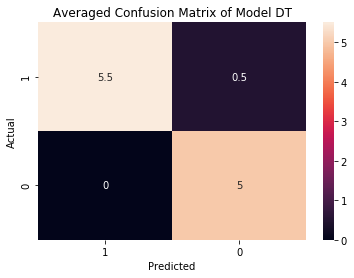

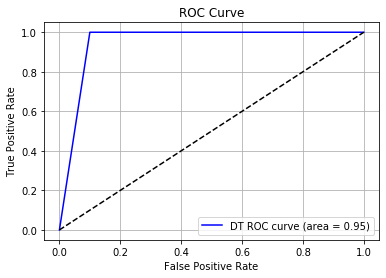

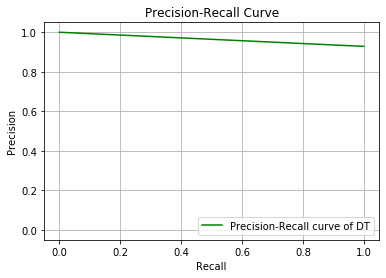

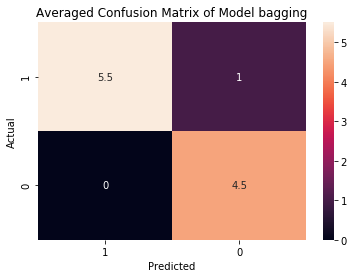

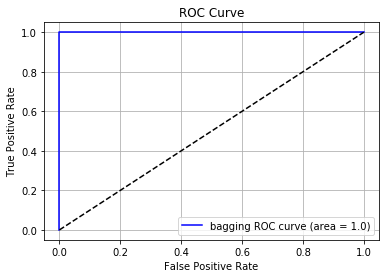

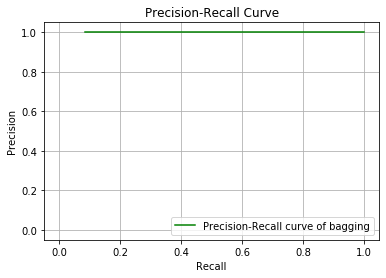

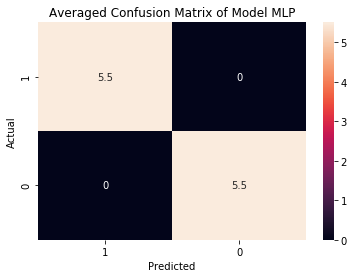

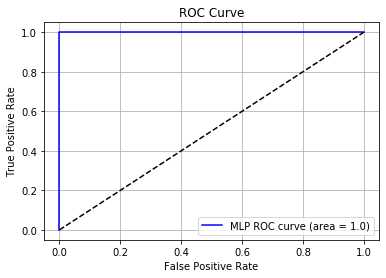

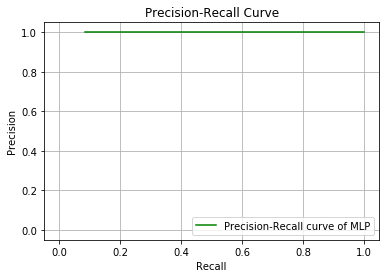

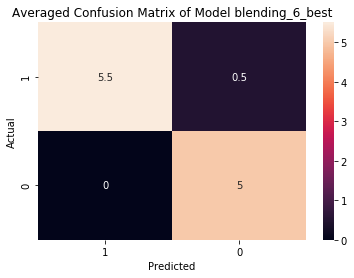

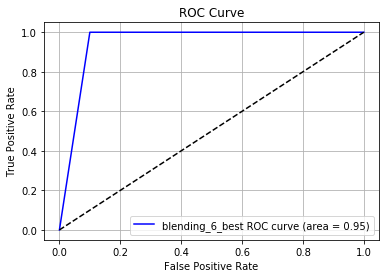

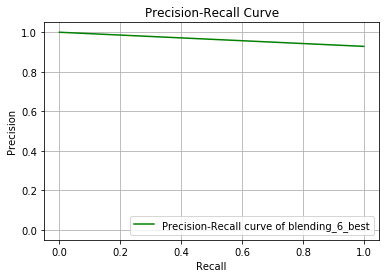

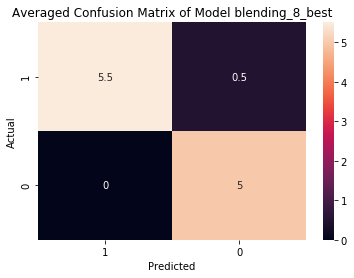

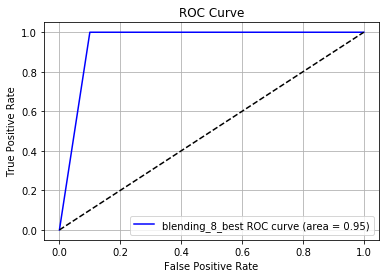

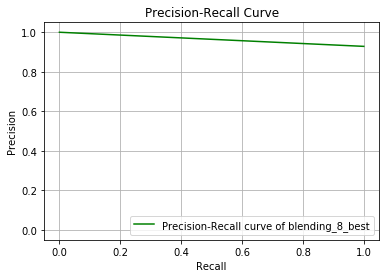

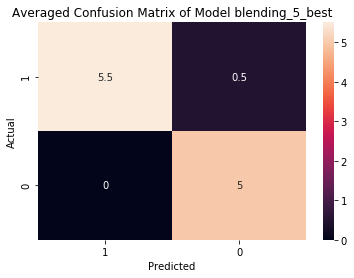

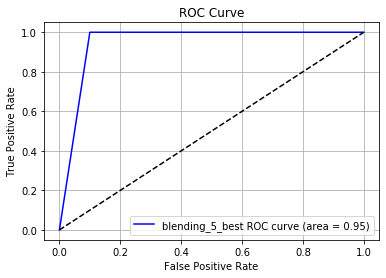

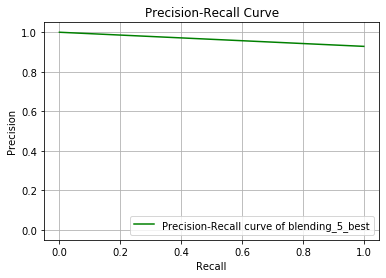

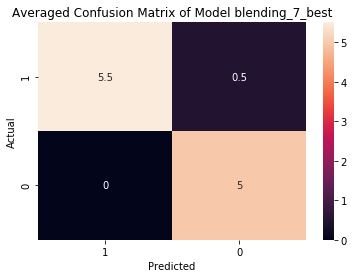

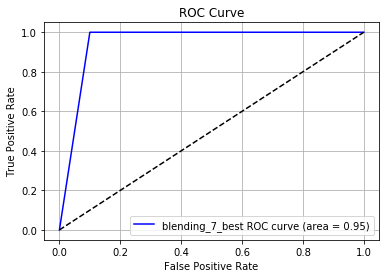

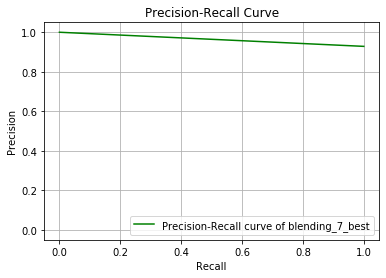

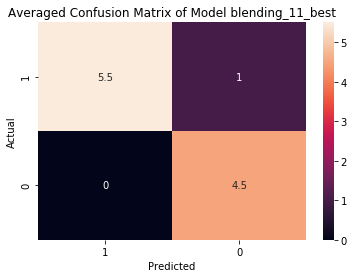

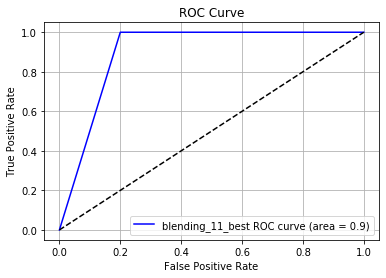

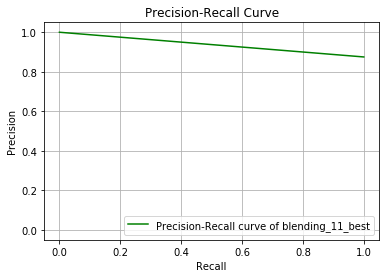

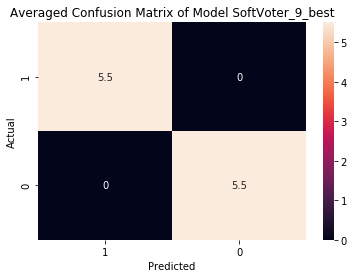

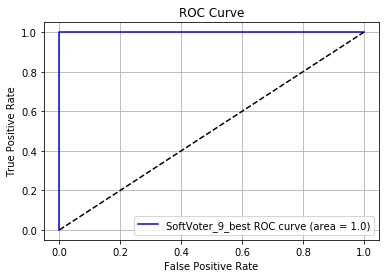

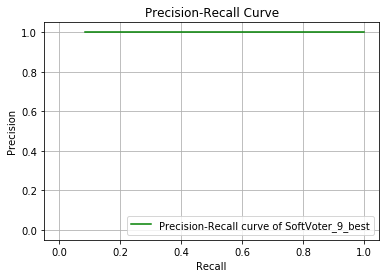

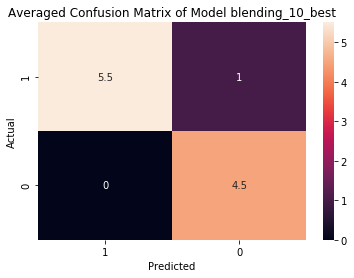

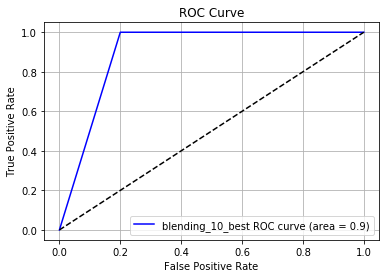

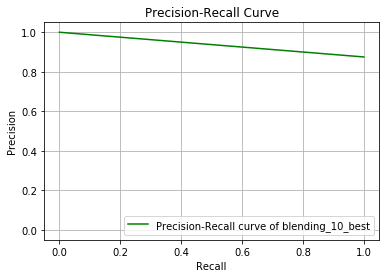

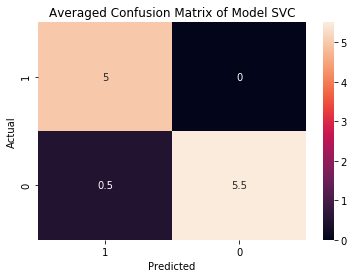

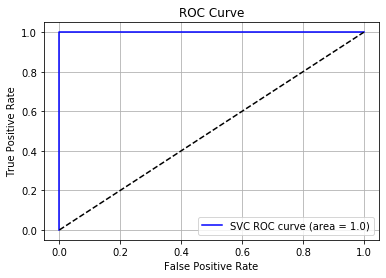

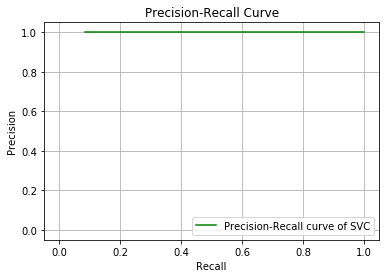

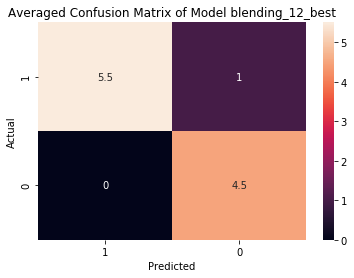

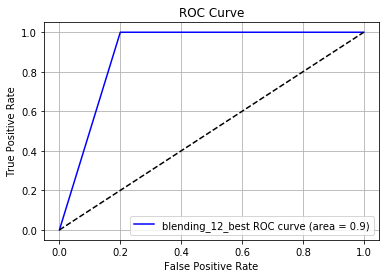

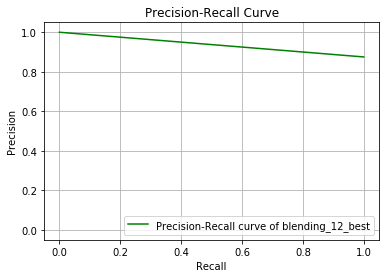

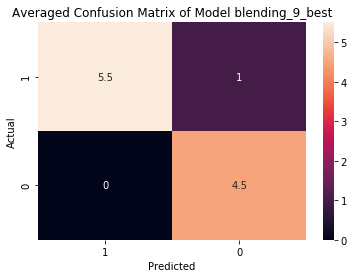

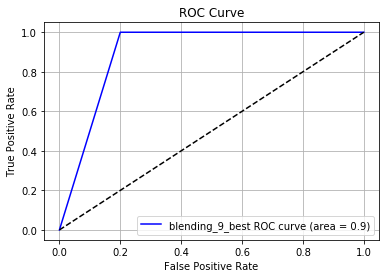

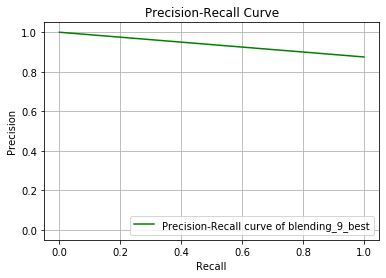

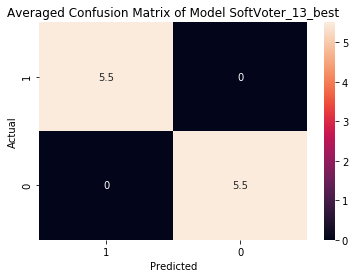

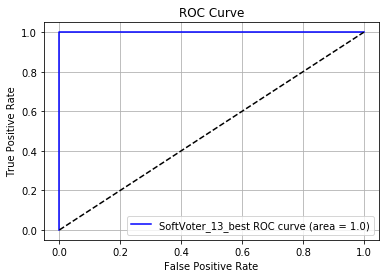

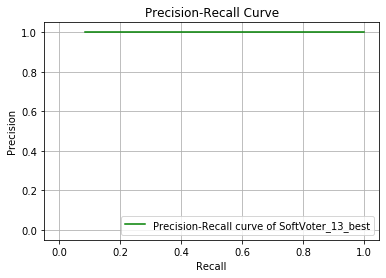

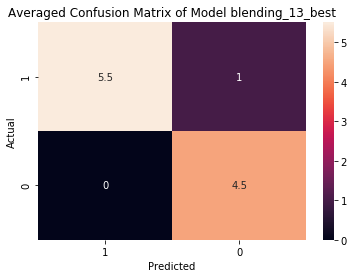

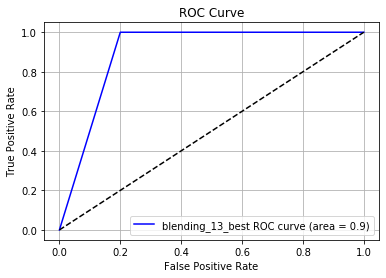

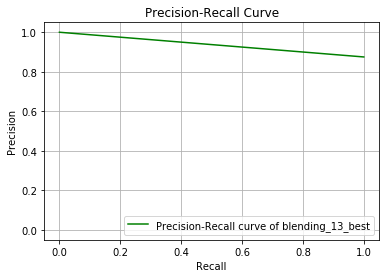

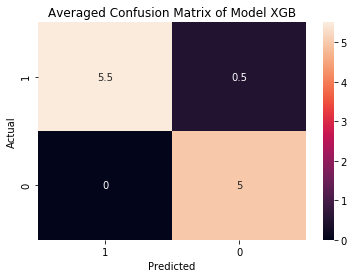

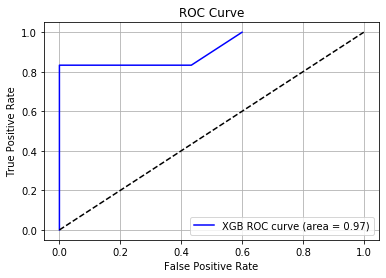

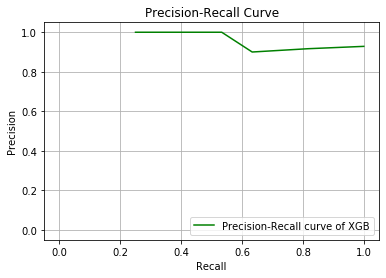

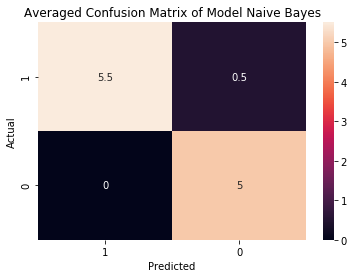

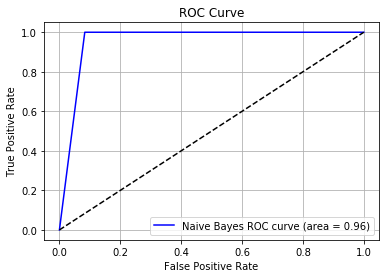

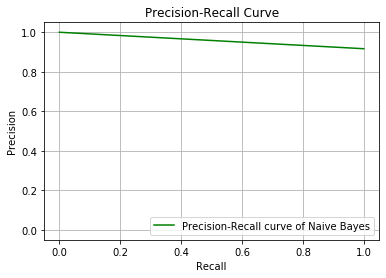

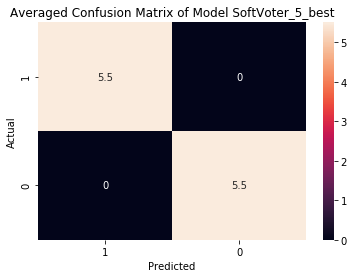

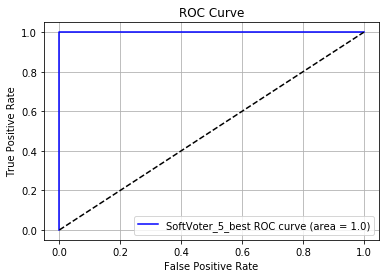

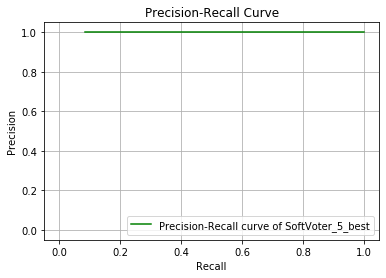

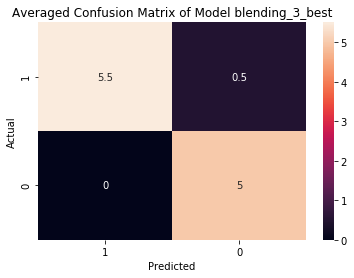

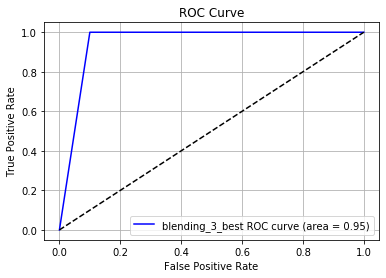

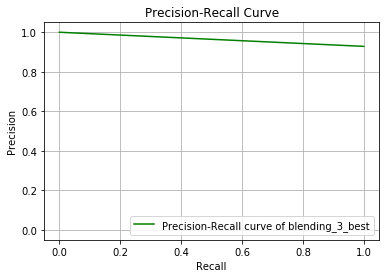

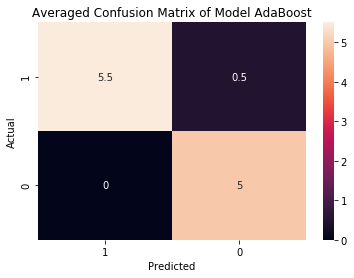

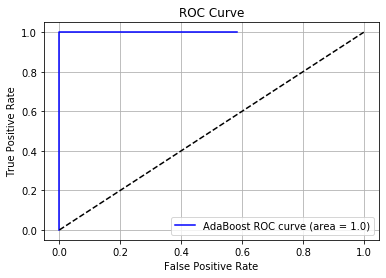

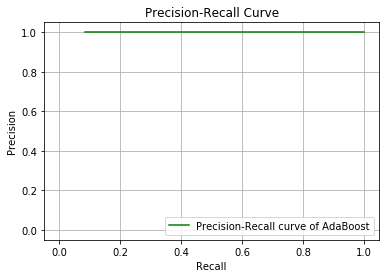

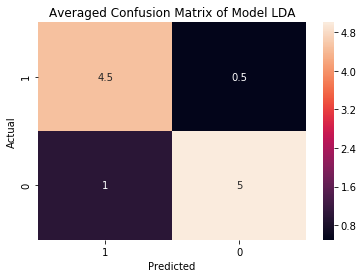

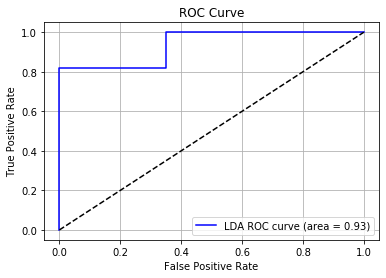

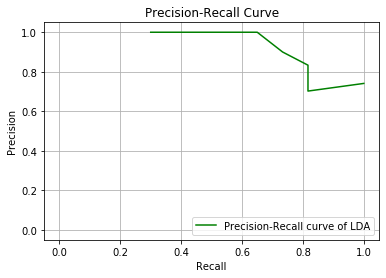

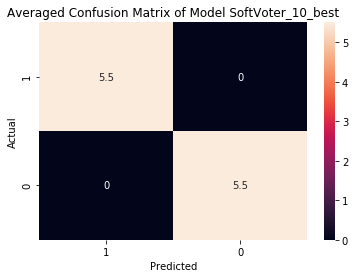

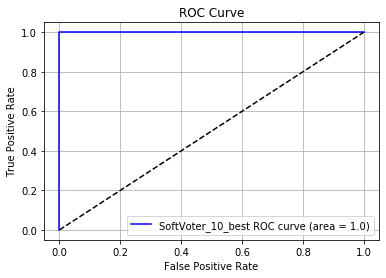

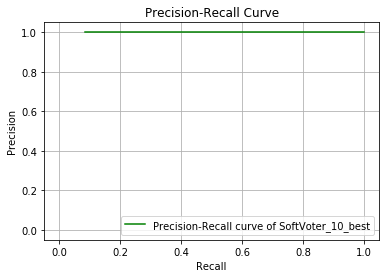

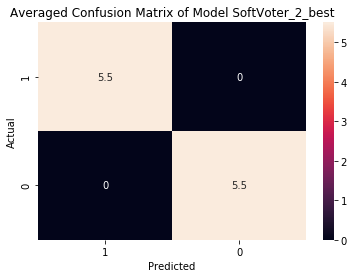

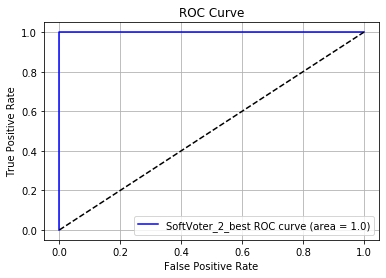

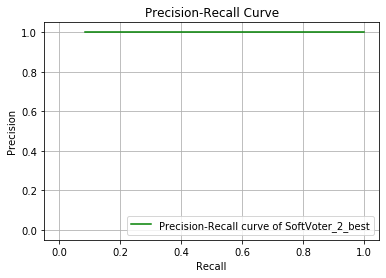

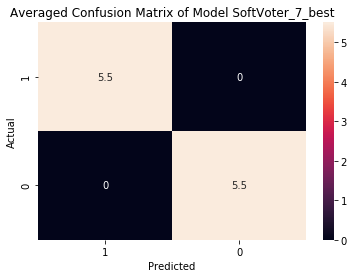

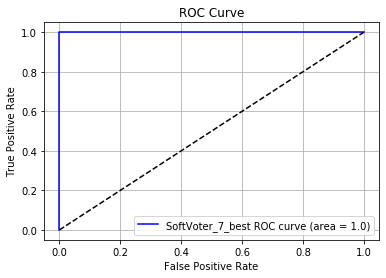

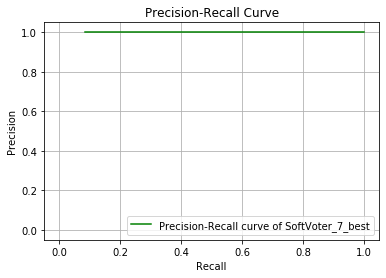

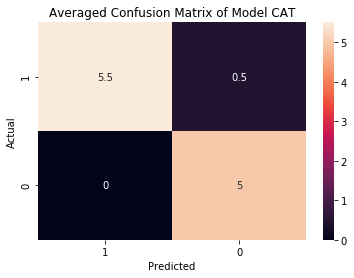

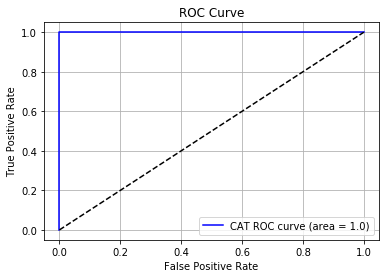

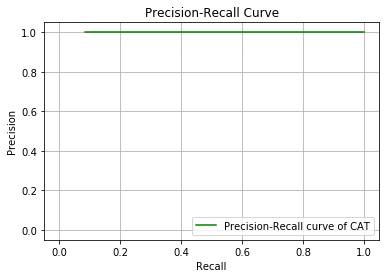

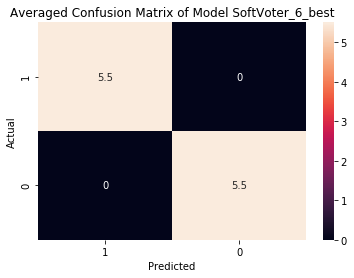

KeyboardInterrupt: 

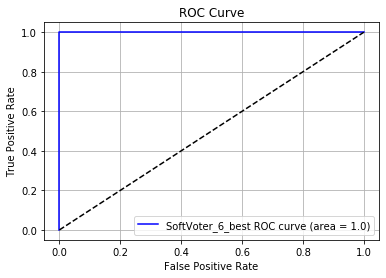

In [1953]:
#confusion matrix and roc curves for each algorithm

for index, row in average_results.iterrows():
    
    name = average_results.iloc[index, 0]
    
    tp = average_results.iloc[index, 8]
    fp = average_results.iloc[index, 9]
    tn = average_results.iloc[index, 10]
    fn = average_results.iloc[index, 11]
    
    roc_auc = average_results.iloc[index, 5]
    tpr = average_results.iloc[index, 6]
    fpr = average_results.iloc[index, 7]
    pre = average_results.iloc[index, 18]
    rec = average_results.iloc[index, 19]
    
    confusion_matrix = pd.DataFrame({'1': [tp,  fn],
                                     '0': [fp,  tn]
                                    })

    confusion_matrix.rename(index={0:'1',1:'0'}, inplace=True)

    ax = sns.heatmap(confusion_matrix, annot=True)

    ax.set(xlabel='Predicted', ylabel='Actual')
    plt.title("Averaged Confusion Matrix of Model " + name)
    plt.savefig('./results/' + name + '/confusion_matrix.png')
    plt.show()

    plt.figure(1)
    
    plt.plot(fpr, tpr, color = 'blue', label='{} ROC curve (area = {:.2})'.format(name, roc_auc))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid()
    plt.savefig('./results/' + name + '/roc_curve.png')
    plt.show()
    
    
    plt.plot(rec, pre, color = 'green', label='Precision-Recall curve of {}'.format(name))
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.savefig('./results/' + name + '/precision_recall_curve.png')
    plt.show()


map = {0: 'Random Forest',
 1: 'Logistic Regression',
 2: 'MLP',
 3: 'KNN',
 4: 'LDA',
 5: 'DT',
 6: 'SVC',
 7: 'SGD',
 8: 'GraBoost',
 9: 'AdaBoost',
 10: 'XGB',
 11: 'Naive Bayes',
 12: 'CAT',
 13: 'blending_2_best',
 14: 'blending_3_best',
 15: 'blending_4_best',
 16: 'blending_5_best',
 17: 'blending_6_best',
 18: 'blending_7_best',
 19: 'blending_8_best',
 20: 'blending_9_best',
 21: 'blending_10_best',
 22: 'blending_11_best',
 23: 'blending_12_best',
 24: 'blending_13_best',
 25: 'bagging',
 26: 'HardVoter_2_best',
 27: 'HardVoter_3_best',
 28: 'HardVoter_4_best',
 29: 'HardVoter_5_best',
 30: 'HardVoter_6_best',
 31: 'HardVoter_7_best',
 32: 'HardVoter_8_best',
 33: 'HardVoter_9_best',
 34: 'HardVoter_10_best',
 35: 'HardVoter_11_best',
 36: 'HardVoter_12_best',
 37: 'stacking'
}

img_name1 = 'all_f_scores'
img_name2 = 'all_accuracies'
dload = os.path.expanduser('~\\Downloads')
save_dir = '.\\results'

#Plot of the average of accuracies of the different algorithms

copy_accuracy = average_results
copy_accuracy.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
accuracies_sorted = copy_accuracy["Test Accuracy"]
accuracies_sorted.rename(index = map,inplace = True) 

cf.go_offline()
init_notebook_mode()


figure = accuracies_sorted.T.iplot(kind = 'bar', asFigure = True, title = 'Average of Accuracies of the Different Algorithms', theme = 'pearl')
iplot(figure,filename=img_name1, image='png')


#Plot of the f-scores of the different algorithms

copy_fscores = average_results
copy_fscores.sort_values(by=["Test F-Score"], ascending=False, inplace=True)
fscores_sorted = copy_fscores["Test F-Score"]
fscores_sorted.rename(index = map,inplace = True) 

cf.go_offline()
init_notebook_mode()


figure = fscores_sorted.T.iplot(kind = 'bar', asFigure = True, title = 'F-Scores of the different algorithms', theme = 'solar')
iplot(figure,filename=img_name2, image='png')

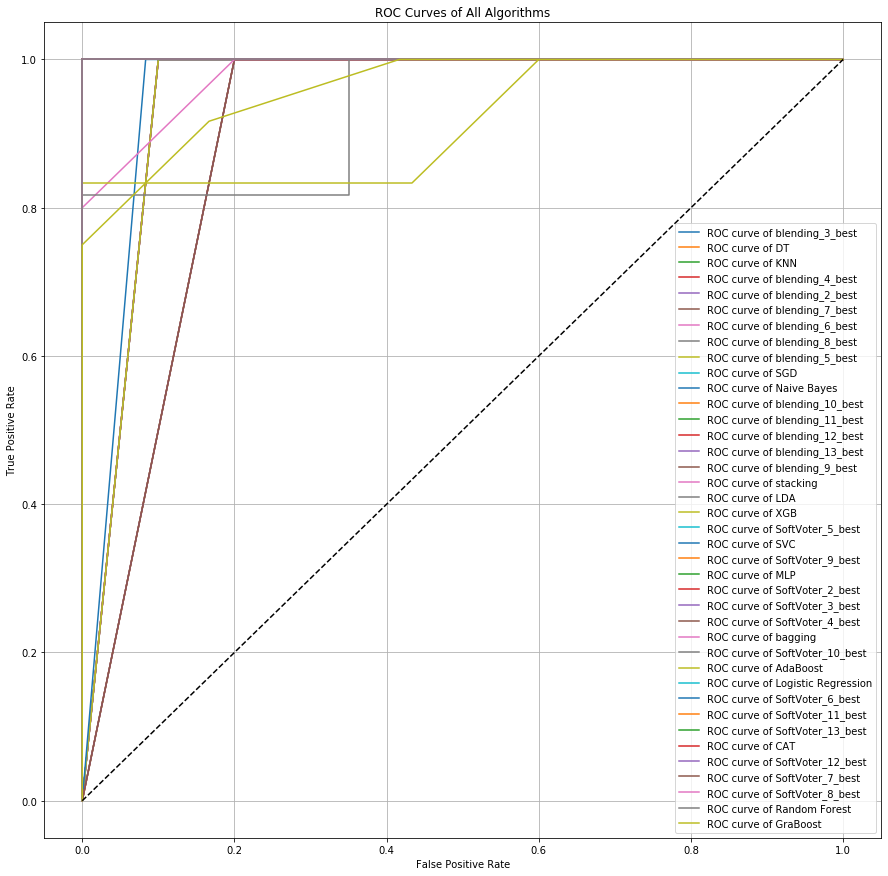

In [1954]:
#roc curves of all algorithms overlapped
copy_roc = average_results
copy_roc.sort_values(by=["TPR"], ascending=False, inplace=True)
tprs_sorted = list(copy_roc["TPR"])
fprs_sorted = list(copy_roc["FPR"])
ticks = list(copy_roc["Model"])

fig1 = plt.figure(figsize=(15,15))
for i in range(0, len(fprs_sorted)):
    plt.plot(fprs_sorted[i], tprs_sorted[i], label='ROC curve of {}'.format(ticks[i]))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of All Algorithms')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.grid()
plt.savefig('./results/all_roc_curve.png')

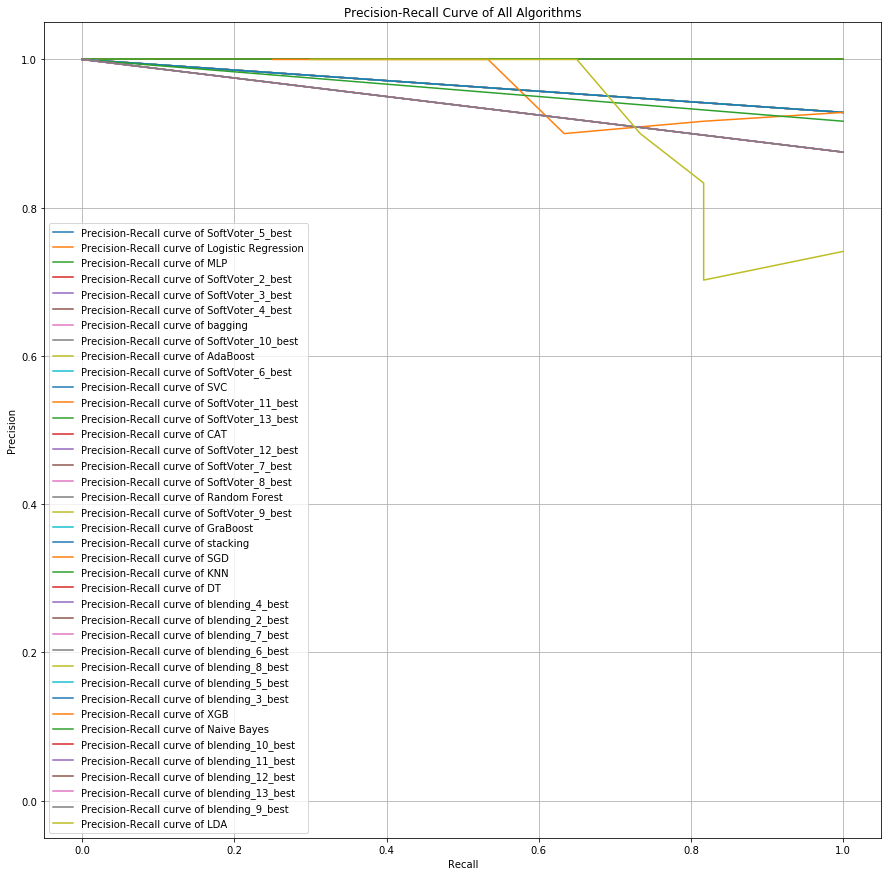

In [1955]:
copy_precisionRecall = average_results
copy_precisionRecall.sort_values(by=["PRE"], ascending=False, inplace=True)
precisions_sorted = list(copy_precisionRecall["PRE"])
recalls_sorted = list(copy_precisionRecall["REC"])
ticks = list(copy_precisionRecall["Model"])

fig1 = plt.figure(figsize=(15,15))
for i in range(0, len(recalls_sorted)):
    plt.plot(recalls_sorted[i], precisions_sorted[i], label='Precision-Recall curve of {}'.format(ticks[i]))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of All Algorithms')
plt.legend(loc="lower left")
plt.grid()
plt.savefig('./results/all_precision_recall.png')
plt.show()

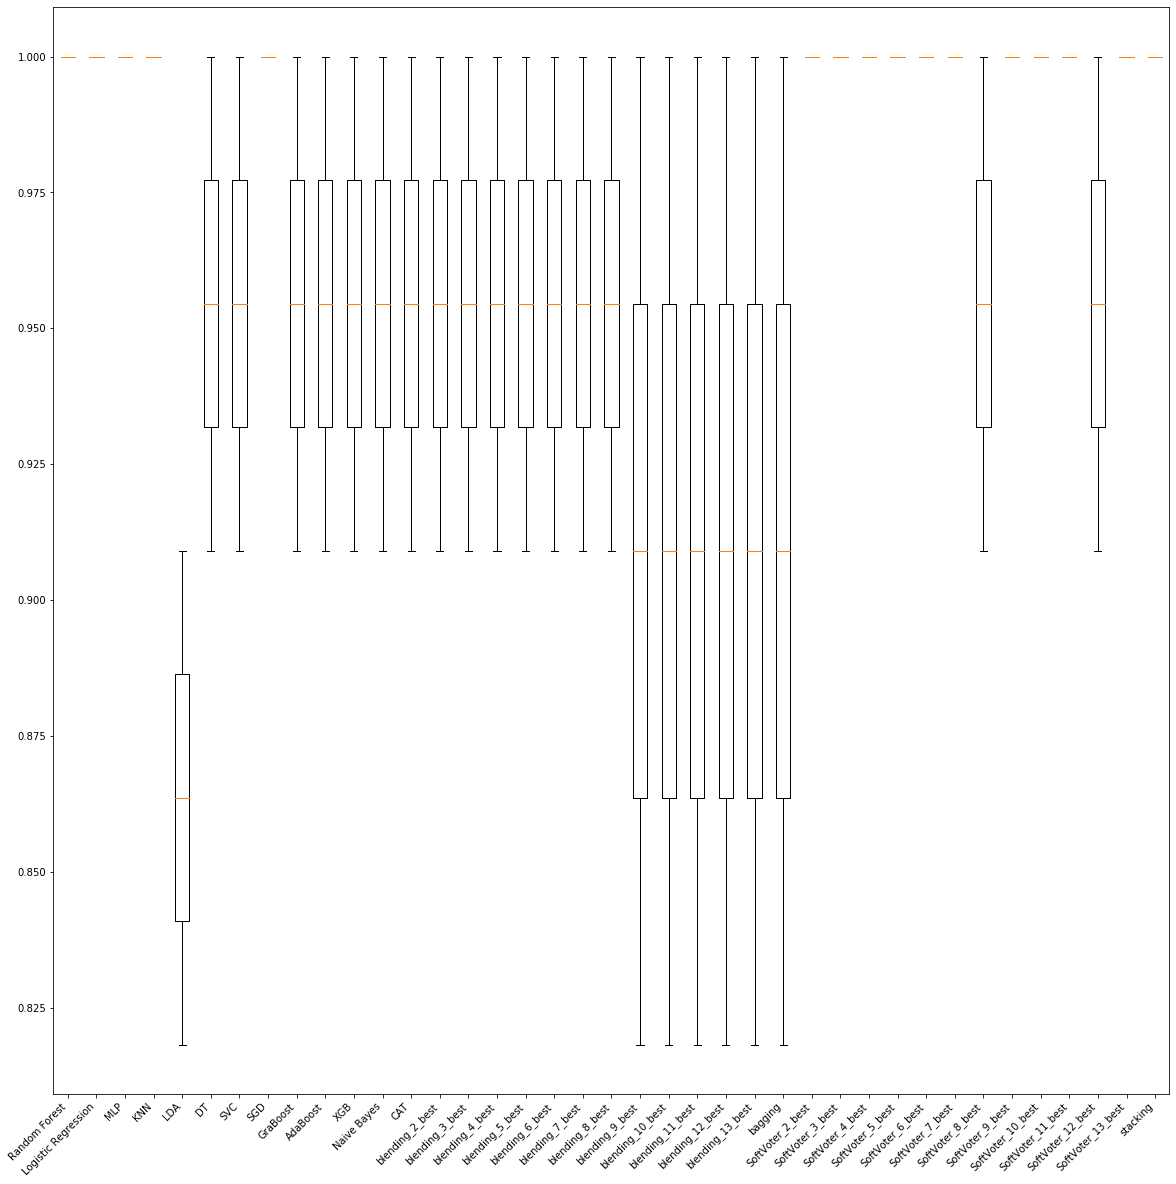

In [1941]:
# boxplot algorithm comparison
fig.suptitle('Comparison of the Models Accuracies during the Experience')

plt.figure(figsize=(20,20))
plt.boxplot(models_test_accuracies.T)
locs, labels=plt.xticks()
x_ticks = []
new_xticks=models_test_accuracies.columns
plt.xticks(locs,new_xticks, rotation=45, horizontalalignment='right')
plt.savefig('./results/boxplot_accuracies.png')
plt.show()


In [1942]:
#saving the plotly images
copyfile('{}\\{}.png'.format(dload, img_name1),
     '{}\\{}.png'.format(save_dir, img_name1))

copyfile('{}\\{}.png'.format(dload, img_name2),
     '{}\\{}.png'.format(save_dir, img_name2))

'.\\results\\all_accuracies.png'

**Finally, we'll analyze the behavior of validation scores vs training scores vs test scores of each algorithm during the 30 experiments in order to check for overfitting/underfitting issues.**

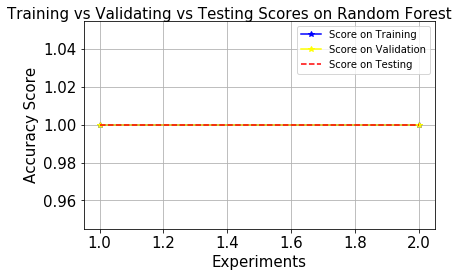

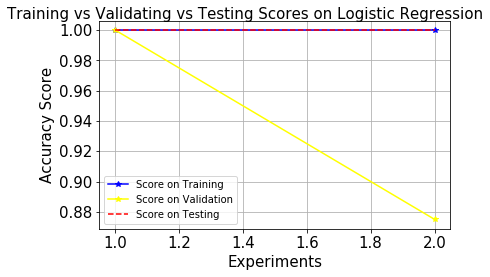

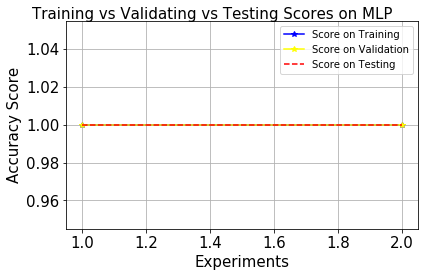

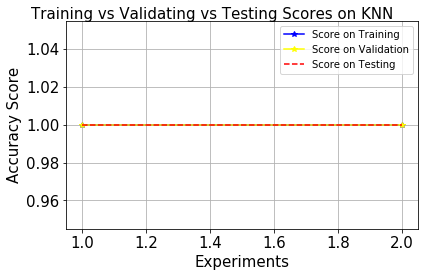

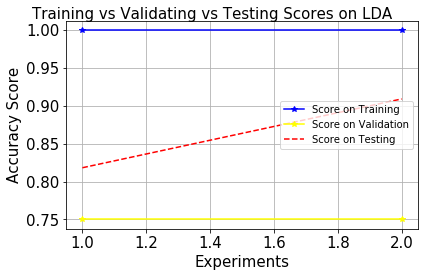

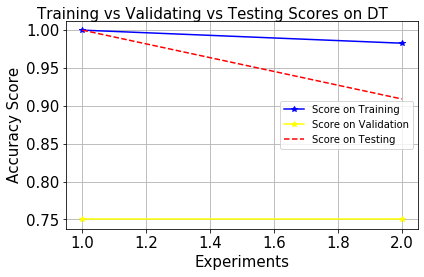

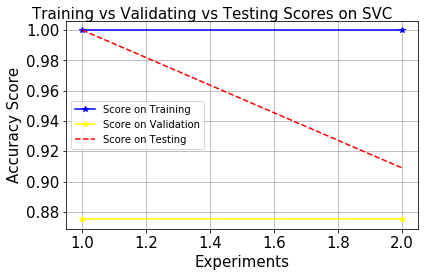

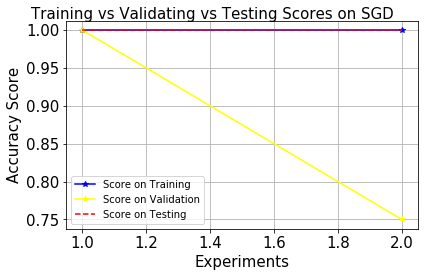

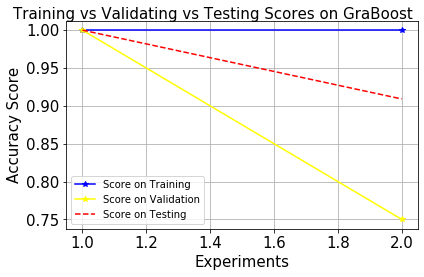

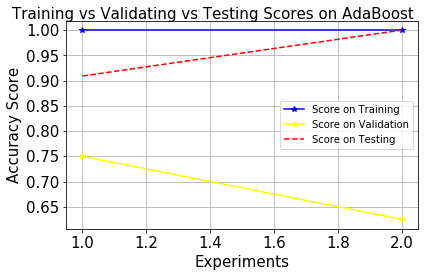

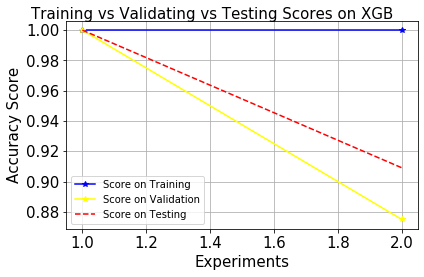

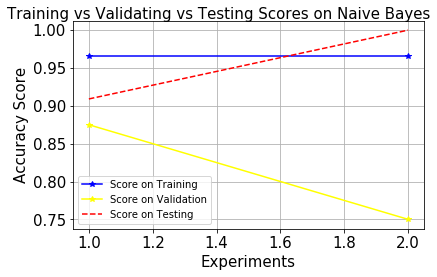

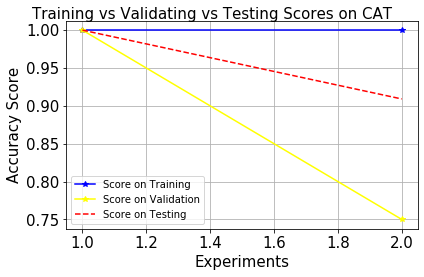

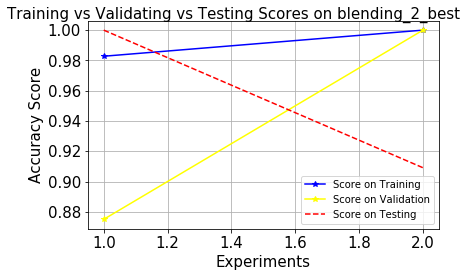

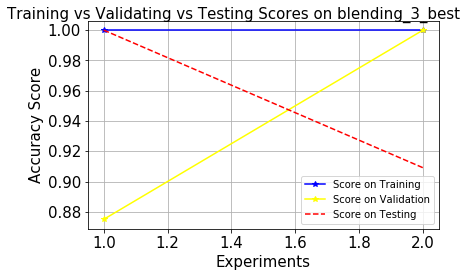

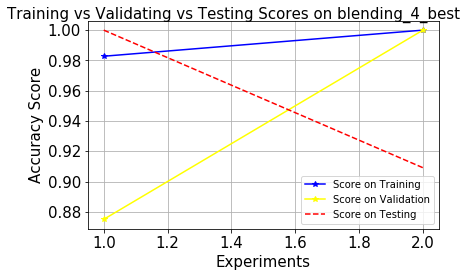

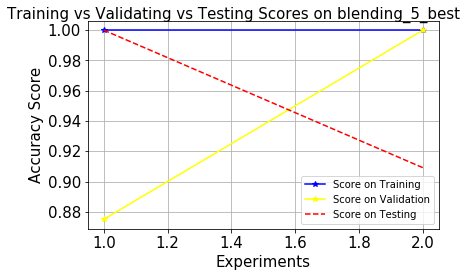

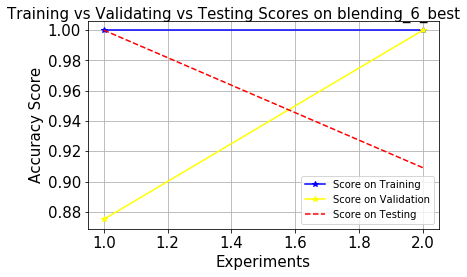

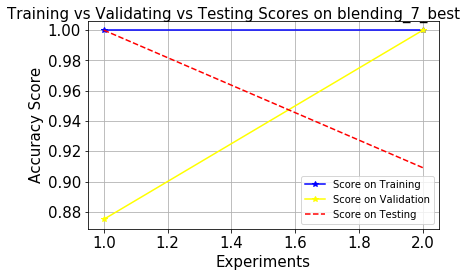

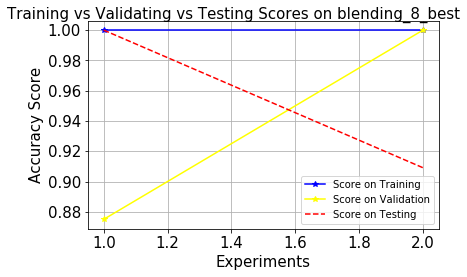

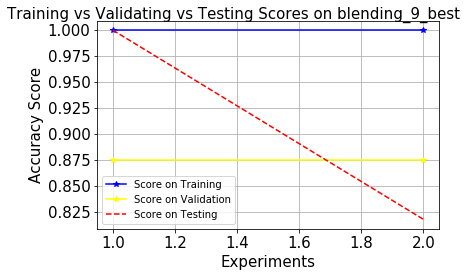

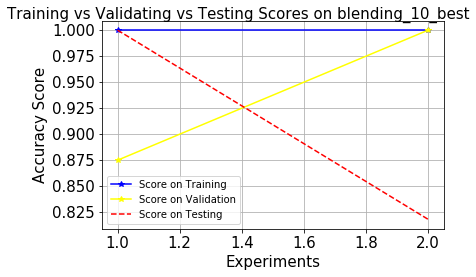

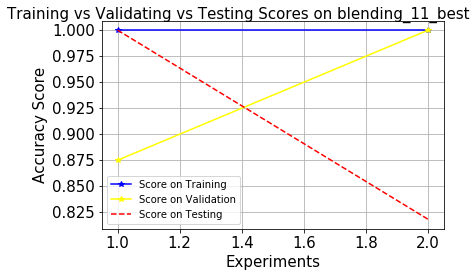

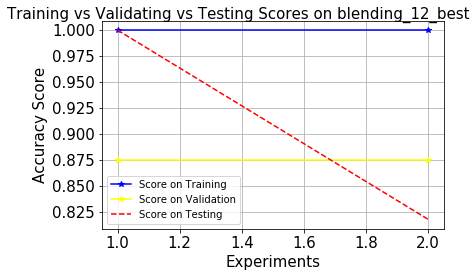

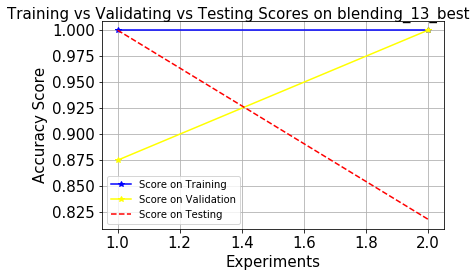

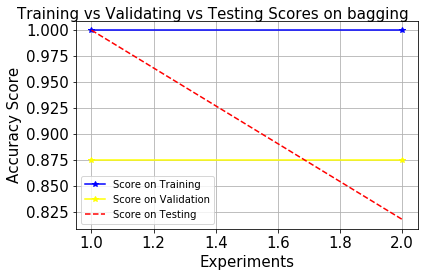

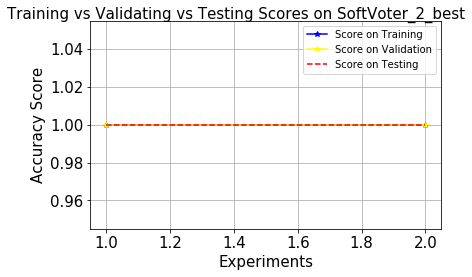

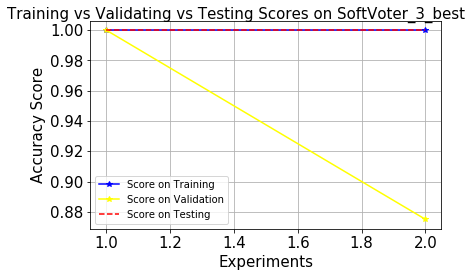

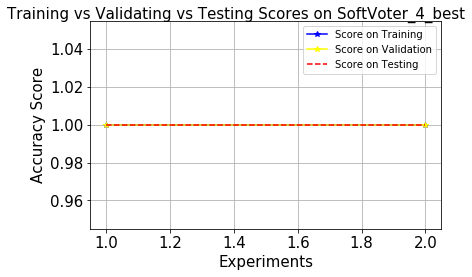

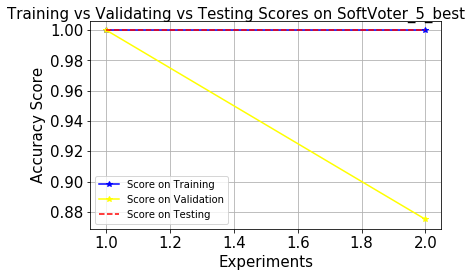

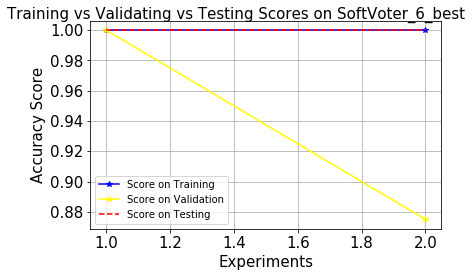

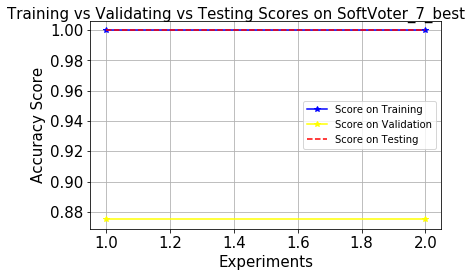

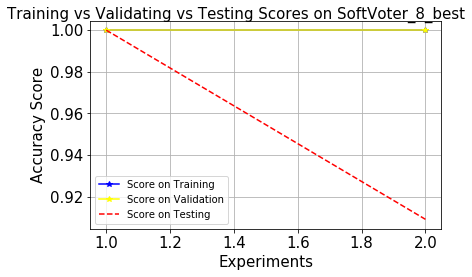

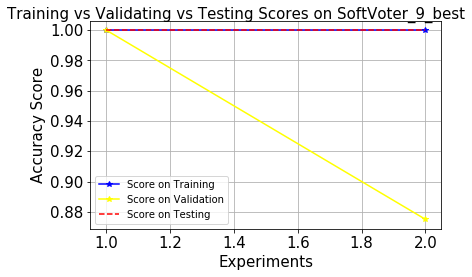

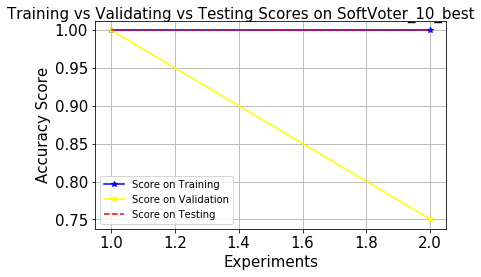

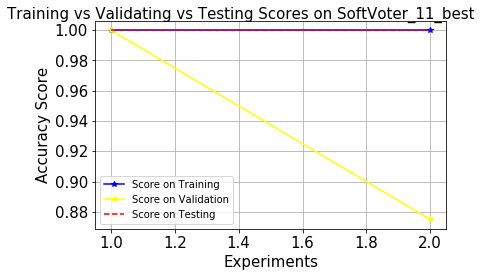

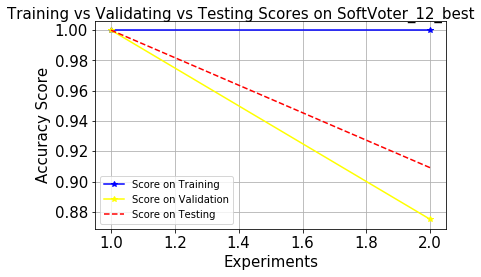

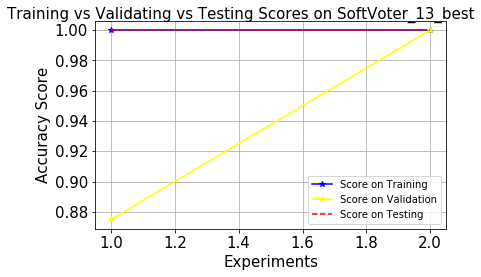

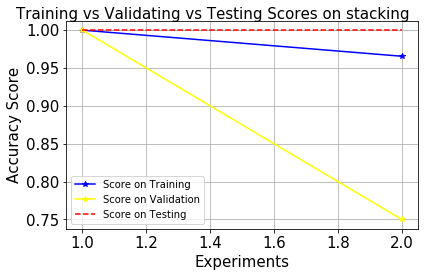

In [1943]:
experiments_array = np.arange(1, num_experiments+1, 1)
for model in all_models:
    plt.plot(experiments_array, models_train_accuracies[model].T, '*-', color = 'blue',  label = 'Score on Training')
    plt.plot(experiments_array, models_validation_accuracies[model].T, '*-', color = 'yellow', label = 'Score on Validation')
    plt.plot(experiments_array, models_test_accuracies[model].T, 'r--',  color = 'red', label = 'Score on Testing') 


    font_size = 15
    plt.xlabel('Experiments', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()
    plt.suptitle('Training vs Validating vs Testing Scores on ' + model + '', fontsize = 15)

    plt.tight_layout(rect = [0, 0.03, 1, 0.97])

    plt.savefig('./results/' + name + '/overfitting_underfitting.png')
    plt.show()

# Statistical Tests and Ranking of the Accuracies

- 1) Ranking the results by rows (experiments)
- 2) Friedman test to see if the null hypothesis that the groups of data are similar can be rejected. 
- 3) Nemenyi test to see if that difference is statistical significative.

In [1944]:
display(models_test_accuracies)

models_test_accuracies.to_html('./results/models_test_accuracies.html')
imgkit.from_file('./results/models_test_accuracies.html', './results/models_test_accuracies.png') # you need to have wkhtmltoimage in your computer  and configure your environmental variable before executing this
os.remove('./results/models_test_accuracies.html')

,Random Forest,Logistic Regression,MLP,KNN,LDA,DT,SVC,SGD,GraBoost,AdaBoost,XGB,Naive Bayes,CAT,blending_2_best,blending_3_best,blending_4_best,blending_5_best,blending_6_best,blending_7_best,blending_8_best,blending_9_best,blending_10_best,blending_11_best,blending_12_best,blending_13_best,bagging,SoftVoter_2_best,SoftVoter_3_best,SoftVoter_4_best,SoftVoter_5_best,SoftVoter_6_best,SoftVoter_7_best,SoftVoter_8_best,SoftVoter_9_best,SoftVoter_10_best,SoftVoter_11_best,SoftVoter_12_best,SoftVoter_13_best,stacking
0,1,1,1,1,0.818182,1,1,1,1,0.909091,1,0.909091,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,0.909091,0.909091,0.909091,1,0.909091,1,0.909091,1,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,1,1,1,1,1,1,0.909091,1,1,1,0.909091,1,1


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


In [1945]:
#Ranking the results by row (experiment)
###
models_test_accuracies = models_test_accuracies.replace(0,0.0001)
models_test_accuracies_transpose = models_test_accuracies.T

models_test_accuracies_ranked = pd.DataFrame(columns=models_test_accuracies.columns)
for i in models_test_accuracies_transpose:
    models_test_accuracies_ranked = models_test_accuracies_ranked.append(models_test_accuracies_transpose.iloc[:,i].pow(-1).rank(method='dense'), ignore_index=True)
    
temp = models_test_accuracies_ranked.append(models_test_accuracies_ranked.sum(numeric_only=True), ignore_index=True)
temp = temp.sort_values(by=num_experiments, axis=1, ascending=True)

display(temp)

,Random Forest,SoftVoter_11_best,SoftVoter_10_best,SoftVoter_9_best,SoftVoter_7_best,SoftVoter_6_best,SoftVoter_5_best,SoftVoter_4_best,SoftVoter_3_best,SoftVoter_2_best,SoftVoter_13_best,stacking,Logistic Regression,MLP,KNN,SGD,CAT,SoftVoter_12_best,SoftVoter_8_best,DT,SVC,GraBoost,AdaBoost,Naive Bayes,blending_8_best,XGB,blending_7_best,blending_6_best,blending_5_best,blending_4_best,blending_3_best,blending_2_best,blending_12_best,blending_11_best,blending_10_best,blending_9_best,blending_13_best,bagging,LDA
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0


In [1946]:
# Friedman and nemenyi test
p_values = sp.posthoc_nemenyi_friedman(temp.iloc[0:num_experiments,:])

In [1947]:
#Assuming that p = 0.05, we can say that...
with open('./results/statistic_results.txt', 'w') as f:
    for i in range(0, len(p_values.columns)):
        for j in range(0, len(p_values.columns)):
            name1 = p_values.columns[i]
            name2 = p_values.columns[j]
            
            if (j >= i):
                break
            if p_values.iloc[i,j] < 0.01:
                if temp.loc[temp.index[num_experiments], name1] < temp.loc[temp.index[num_experiments], name2]:
                    print("Algorithm " + p_values.columns[i] + " is statistically way much better than " + p_values.columns[j], file=f)
                    print("Algorithm " + p_values.columns[i] + " is statistically way much better than " + p_values.columns[j])
                elif temp.loc[temp.index[num_experiments], name1] > temp.loc[temp.index[num_experiments], name2]:
                    print("Algorithm " + p_values.columns[j] + " is statistically way much better than " + p_values.columns[i], file=f)
                    print("Algorithm " + p_values.columns[j] + " is statistically way much better than " + p_values.columns[i])
            elif p_values.iloc[i,j] < 0.05:
                if temp.loc[temp.index[num_experiments], name1] < temp.loc[temp.index[num_experiments], name2]:
                    print("Algorithm " + p_values.columns[i] + " is statistically better than " + p_values.columns[j], file=f)
                    print("Algorithm " + p_values.columns[i] + " is statistically better than " + p_values.columns[j])
                elif temp.loc[temp.index[num_experiments], name1] > temp.loc[temp.index[num_experiments], name2]:
                    print("Algorithm " + p_values.columns[j] + " is statistically better than " + p_values.columns[i], file=f)
                    print("Algorithm " + p_values.columns[j] + " is statistically better than " + p_values.columns[i])

# Interpretability/Explainability

## Alternative Methods to Feature Selection

Filter Method - easiest but not the best way

In [1948]:
"""
#Filter Method - easiest but not the best way
print(X[["sex","relationship"]].corr())

X = X.drop('relationship',axis=1)
"""

'\n#Filter Method - easiest but not the best way\nprint(X[["sex","relationship"]].corr())\n\nX = X.drop(\'relationship\',axis=1)\n'

### FORWARD SELECTION (wrapper method 2)

Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

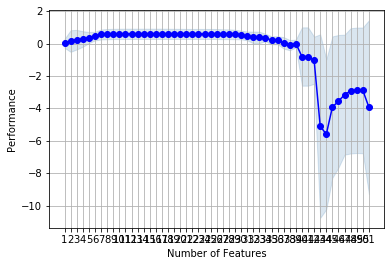

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week')


"\nX_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)\n\nsfs1 = sfs(model_1 , k_features=9 , forward=True , scoring='r2')\nsfs1 = sfs1.fit(X_train,y_train)\nsfs1.k_feature_names_\n\nlr=LinearRegression().fit(X_train,y_train)\ny_pred_fs=lr.predict(X_test)\nr2_score(y_test,y_pred_fs)\n"

In [1949]:
sfs1 = sfs(LinearRegression(), k_features=len(X.columns) , forward=True , scoring='r2')
sfs1 = sfs1.fit(X,Y)
fig = plot_sfs(sfs1.get_metric_dict())
plt.grid(True)
plt.show()

print(sfs1.k_feature_names_)

"""
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

sfs1 = sfs(model_1 , k_features=9 , forward=True , scoring='r2')
sfs1 = sfs1.fit(X_train,y_train)
sfs1.k_feature_names_

lr=LinearRegression().fit(X_train,y_train)
y_pred_fs=lr.predict(X_test)
r2_score(y_test,y_pred_fs)
"""

### RECURSIVE FEATURE ELIMINATION (wrapper method 3)

It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. We need to find the optimum number of features, 
for which the accuracy is the highest. It then ranks the features based on the order of their elimination.

In [1950]:
nof_list=np.arange(1,len(df.columns)+1)            
high_score=0

nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 1.000000


In [1951]:
#Now that we now the perfect number of features, we feed them to a RFE and get the final set of features given by RFE:'''
cols = list(X.columns)
model = LogisticRegression()

rfe = RFE(model, nof)             

X_rfe = rfe.fit_transform(X,Y)  

model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

X = X[selected_features_rfe]

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False]
[22 26 25 48 14 15 21 32  8 33 37 38 34  7 20 16 19 45 30 27  1 18 35 39
 13 49 43 42 41 29 23 10  5 40  4 12 24  9 44 36 46 47 11  3 28 17 31  2
 50  1  6]


FEATURE SELECTION - EMBEDDED METHOD

In [1952]:
'''We iterate over the model training process and carefully 
extract those features which contribute the most 
to the training for a particular iteration, 
penalizing a feature given a threshold.
Here we will do feature selection using Lasso regularization. 
If the feature is irrelevant, lasso penalizes its coefficient making it 0. 
Features with coefficient = 0 are removed.'''

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

NameError: name 'y' is not defined

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model");plt.show()

#Here Lasso model has taken all the features except NOX, CHAS and INDUS.

Example of SelectKBest (chi2)

In [ ]:
#EXAMPLE OF USING SICKIT LEARN TO SELECT THE TWO BEST FEATURES
#https://github.com/knathanieltucker/bit-of-data-science-and-scikit-learn/blob/master/notebooks/FeatureSelection.ipynb
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,np.ravel(y))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

** Example of ExtRaTreesClassifier() **

In [ ]:
#FEATURE SELECTION USING EXTRA TREES CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

** Example of RFECV(RandomForestClassifier()) **

In [ ]:
#RECURSIVE FEATURE ELIMINATION with cross validation (using Random Forest)
'''Assigns weights to features (e.g., the coefficients of a linear model). 
Features whose weights are the smallest are pruned out.'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

m = RFECV(RandomForestClassifier(), scoring = 'accuracy')
m.fit(X,y)
m.score(X,y)

Example of SelectFromModel (LinearSVC)

In [ ]:
#FEATURE SELECTION USING SelectFromModel AND SVC

'''features are considered unimportant and removed, 
if the corresponding coef_ or featureimportances values 
are below the provided threshold parameter.
Available heuristics are “mean”, “median” 
and float multiples of these like “0.1*mean”.'''

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

m = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))
m.fit(X, y)

** Example of SelectFromModel (LassoCV) **

In [ ]:
#FEATURE SELECTION USING SelectFromModel AND LASSO

from sklearn.linear_model import LassoCV

m = SelectFromModel(LassoCV(cv = 5))
m.fit(X,y)
#m.transform(X).shape

## (Optional Advanced Optimization) Iterations of Feature Selection/Feature Creation 

- Deep Feature Synthesis 
    - Min, max, etc
    - Squared, Cubed, etc
- Combination of Features
- Clustering, t-SNE, etc

In [ ]:
"""
for col in X.columns:
    feature_matrix_add, feature_names_add = ft.dfs(entityset=es, target_entity = col, 
                                       agg_primitives = ['min', 'max', 'mean', 'percent_true', 'all', 'any',
                                                         'sum', 'skew', 'std', range_, pcorr_],
                                       trans_primitives = ['divide'], drop_contains = list(all_features),
                                       max_depth = 2, max_features = 100,
                                       verbose = 1, n_jobs = -1, 
                                       chunk_size = 1000)


    all_features += [str(x.get_name()) for x in feature_names_add]
    X = pd.concat([X, feature_matrix_add], axis = 1)
#Next it is important to do all the pre processing again befores training/testing the model
"""

# Prepare your submission with your best model

# Load models, to make predictions


FULL DATA CLEANSING AND CLASSIFICATION PIPELINE¶

In [ ]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Read data from Titanic dataset.
df = pd.read_csv('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')

#We create the preprocessing pipelines for both numeric and categorical data
numeric_features = ['age','fare']

numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Append classifier to preprocessing pipeline
#Now we have a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

X = df.drop('survived', axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))